# IQM Benchmarks: Summary Notebook

In [2]:
%load_ext autoreload
%autoreload 2

## Choose (or define) a backend

In [3]:
backend = "fakeadonis"
#backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

#from iqm.qiskit_iqm.iqm_provider import IQMProvider
#iqm_url="https:"
#provider = IQMProvider(iqm_url)
#backend = provider.get_backend()

## Set IQM Token if using Resonance.

In [4]:
# import os
# os.environ["IQM_TOKEN"] = ""

## Clifford Randomized Benchmarking

NB: Clifford RB is executed by default with Interleaved RB !

In [5]:
from iqm.benchmarks.randomized_benchmarking.clifford_rb.clifford_rb import *

In [6]:
EXAMPLE_CRB = CliffordRBConfiguration(
    qubits_array=[[0,2]],#,[8,9],[13,14],[17,18],[5,6],[10,11],[15,16]],
    sequence_lengths=[2**(m+1)-1 for m in range(7)],
    num_circuit_samples=25,
    shots=2**8,
    calset_id=None,
    parallel_execution=False,
)

In [7]:
benchmark_clifford_rb = CliffordRandomizedBenchmarking(backend, EXAMPLE_CRB)
run_clifford_rb = benchmark_clifford_rb.run()

2025-01-10 16:58:32,410 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-01-10 16:58:32,411 - iqm.benchmarks.logging_config - INFO - Executing sequential Clifford RB on qubits [0, 2]. Will generate and submit all 25 Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127]
2025-01-10 16:58:32,411 - iqm.benchmarks.logging_config - INFO - Now at sequence length 1
2025-01-10 16:58:32,487 - iqm.benchmarks.logging_config - INFO - Now at sequence length 3
2025-01-10 16:58:32,639 - iqm.benchmarks.logging_config - INFO - Now at sequence length 7
2025-01-10 16:58:32,949 - iqm.benchmarks.logging_config - INFO - Now at sequence length 15
2025-01-10 16:58:35,500 - iqm.benchmarks.logging_config - INFO - Now at sequence length 31
2025-01-10 16:58:36,841 - iqm.benchmarks.logging_config - INFO - Now at sequence length 63
2025-01-10 16:58:45,251 - iqm.benchmarks.logging_config - INFO - Now at sequence length 127
2025-01-10 16:58:53,648 - iqm.benchmarks.lo

In [8]:
result_clifford_rb = benchmark_clifford_rb.analyze()

2025-01-10 16:59:02,639 - iqm.benchmarks.logging_config - INFO - Post-processing sequential RB for qubits [[0, 2]]
2025-01-10 16:59:02,643 - iqm.benchmarks.logging_config - INFO - Qubits [0, 2] and depth 1
2025-01-10 16:59:02,647 - iqm.benchmarks.logging_config - INFO - Qubits [0, 2] and depth 3
2025-01-10 16:59:02,651 - iqm.benchmarks.logging_config - INFO - Qubits [0, 2] and depth 7
2025-01-10 16:59:02,655 - iqm.benchmarks.logging_config - INFO - Qubits [0, 2] and depth 15
2025-01-10 16:59:02,659 - iqm.benchmarks.logging_config - INFO - Qubits [0, 2] and depth 31
2025-01-10 16:59:02,663 - iqm.benchmarks.logging_config - INFO - Qubits [0, 2] and depth 63
2025-01-10 16:59:02,667 - iqm.benchmarks.logging_config - INFO - Qubits [0, 2] and depth 127


{'clifford': {'[0, 2]': 0.9487496885745926}}
[0, 2]
clifford


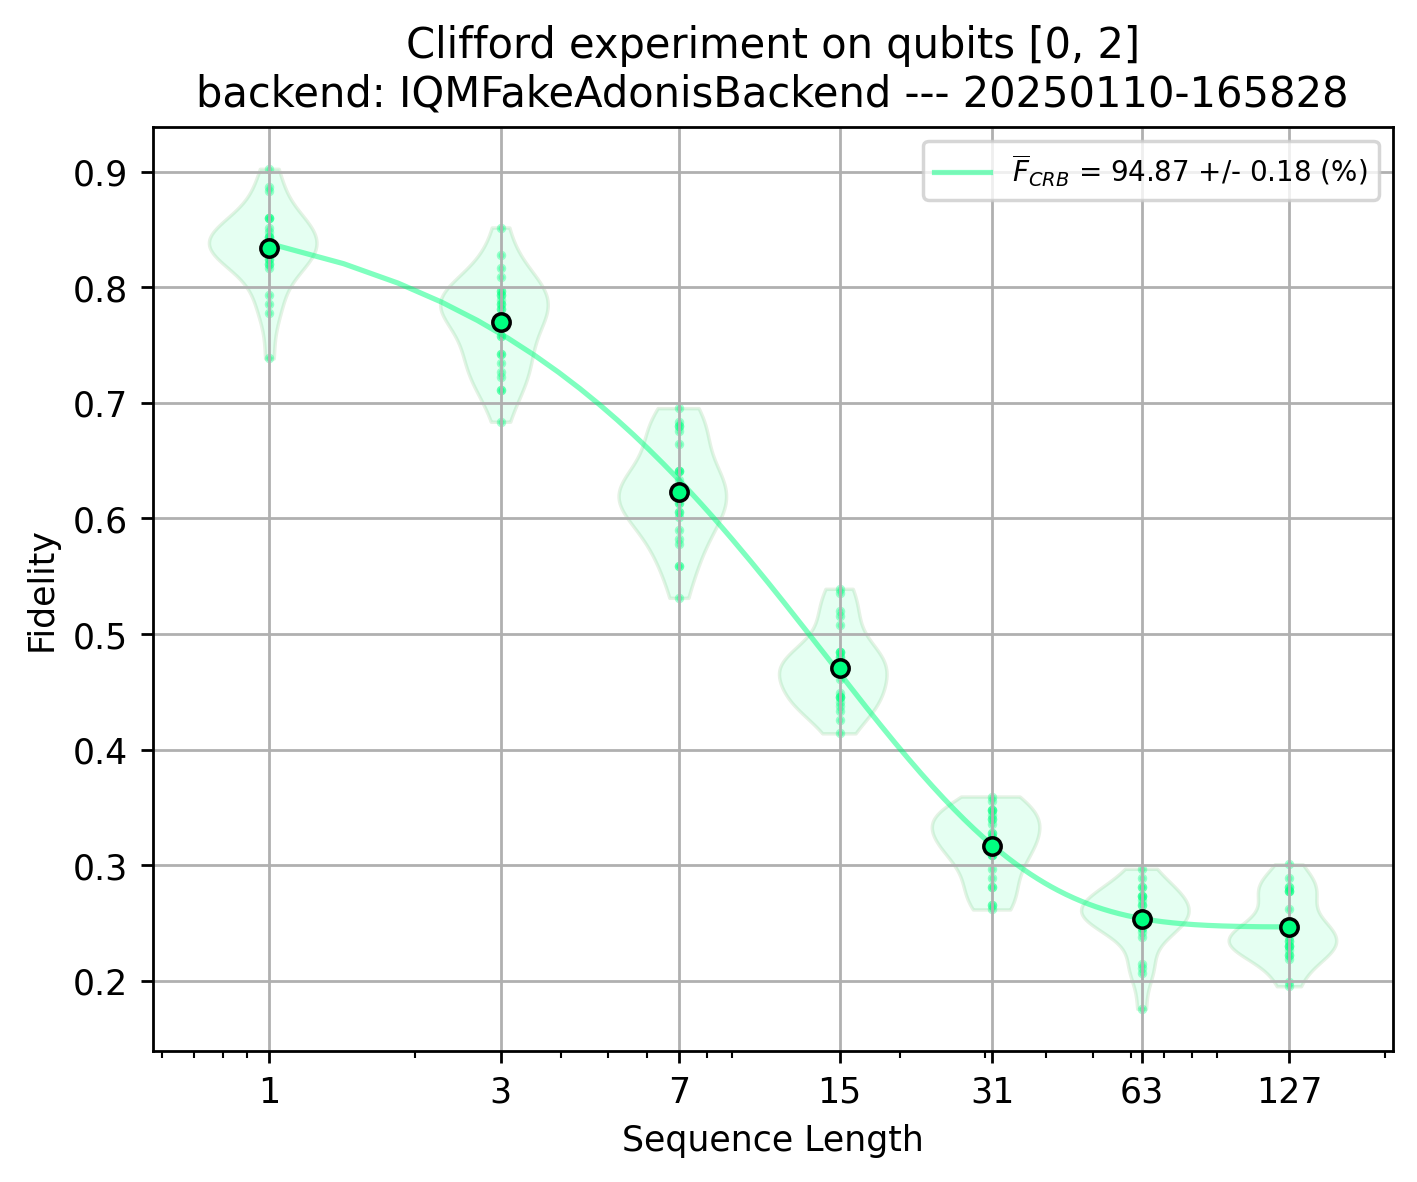

In [9]:
for plot in result_clifford_rb.plots.values():
    display(plot)

## Interleaved Randomized Benchmarking

In [10]:
from iqm.benchmarks.randomized_benchmarking.interleaved_rb.interleaved_rb import *
import numpy as np

In [11]:
EXAMPLE_IRB_1Q = InterleavedRBConfiguration(
    qubits_array=[[0],[1],[2],[3],[4]],
    sequence_lengths=[2**(m+1)-1 for m in range(8)],
    num_circuit_samples=25,
    shots=2**9,
    calset_id=None,
    parallel_execution=False,
    interleaved_gate = "RGate",
    interleaved_gate_params = [np.pi, 0],
    simultaneous_fit = ["amplitude", "offset"],
)

In [12]:
benchmark_irb_1Q = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_1Q)
run_irb_1Q = benchmark_irb_1Q.run()

2025-01-10 16:59:21,734 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-01-10 16:59:21,958 - iqm.benchmarks.logging_config - INFO - Wxecuting sequential Clifford and Interleaved RB circuits on qubits [0]. Will generate and submit all 25 Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127, 255]
2025-01-10 16:59:21,959 - iqm.benchmarks.logging_config - INFO - Now at sequence length 1
2025-01-10 16:59:22,000 - iqm.benchmarks.logging_config - INFO - Now at sequence length 3
2025-01-10 16:59:22,041 - iqm.benchmarks.logging_config - INFO - Now at sequence length 7
2025-01-10 16:59:22,122 - iqm.benchmarks.logging_config - INFO - Now at sequence length 15
2025-01-10 16:59:26,925 - iqm.benchmarks.logging_config - INFO - Now at sequence length 31
2025-01-10 16:59:27,229 - iqm.benchmarks.logging_config - INFO - Now at sequence length 63
2025-01-10 16:59:27,841 - iqm.benchmarks.logging_config - INFO - Now at sequence length 127
2025-01-10 16:59

In [13]:
result_irb_1Q = benchmark_irb_1Q.analyze()

2025-01-10 17:03:35,639 - iqm.benchmarks.logging_config - INFO - Post-processing sequential Interleaved RB for qubits [[0], [1], [2], [3], [4]]
2025-01-10 17:03:35,682 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 1
2025-01-10 17:03:35,724 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 3
2025-01-10 17:03:35,766 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 7
2025-01-10 17:03:35,811 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 15
2025-01-10 17:03:35,855 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 31
2025-01-10 17:03:35,901 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 63
2025-01-10 17:03:35,943 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 127
2025-01-10 17:03:35,986 - iqm.benchmarks.logging_config - INFO - No

{'interleaved': {'[0]': 0.9987487631380596}, 'clifford': {'[0]': 0.9976446981909068}}
[0]
clifford
{'interleaved': {'[1]': 0.9966759568052321}, 'clifford': {'[1]': 0.993530034195362}}
[1]
clifford
{'interleaved': {'[2]': 0.9990404653517758}, 'clifford': {'[2]': 0.9981264795208118}}
[2]
clifford
{'interleaved': {'[3]': 0.9993022807449614}, 'clifford': {'[3]': 0.9986351324410088}}
[3]
clifford
{'interleaved': {'[4]': 0.9973448276409616}, 'clifford': {'[4]': 0.9955188886796882}}
[4]
clifford


In [14]:
result_irb_1Q.observations

[BenchmarkObservation(name='avg_gate_fidelity_interleaved', value=0.9987487631380596, identifier=BenchmarkObservationIdentifier(qubit_indices=[0]), uncertainty=3.252344351282814e-05),
 BenchmarkObservation(name='avg_gate_fidelity_clifford', value=0.9976446981909068, identifier=BenchmarkObservationIdentifier(qubit_indices=[0]), uncertainty=3.427765436266417e-05),
 BenchmarkObservation(name='avg_gate_fidelity_interleaved', value=0.9966759568052321, identifier=BenchmarkObservationIdentifier(qubit_indices=[1]), uncertainty=8.311072136492597e-05),
 BenchmarkObservation(name='avg_gate_fidelity_clifford', value=0.993530034195362, identifier=BenchmarkObservationIdentifier(qubit_indices=[1]), uncertainty=6.508513064336435e-05),
 BenchmarkObservation(name='avg_gate_fidelity_interleaved', value=0.9990404653517758, identifier=BenchmarkObservationIdentifier(qubit_indices=[2]), uncertainty=0.00011479325016746003),
 BenchmarkObservation(name='avg_gate_fidelity_clifford', value=0.9981264795208118, ide

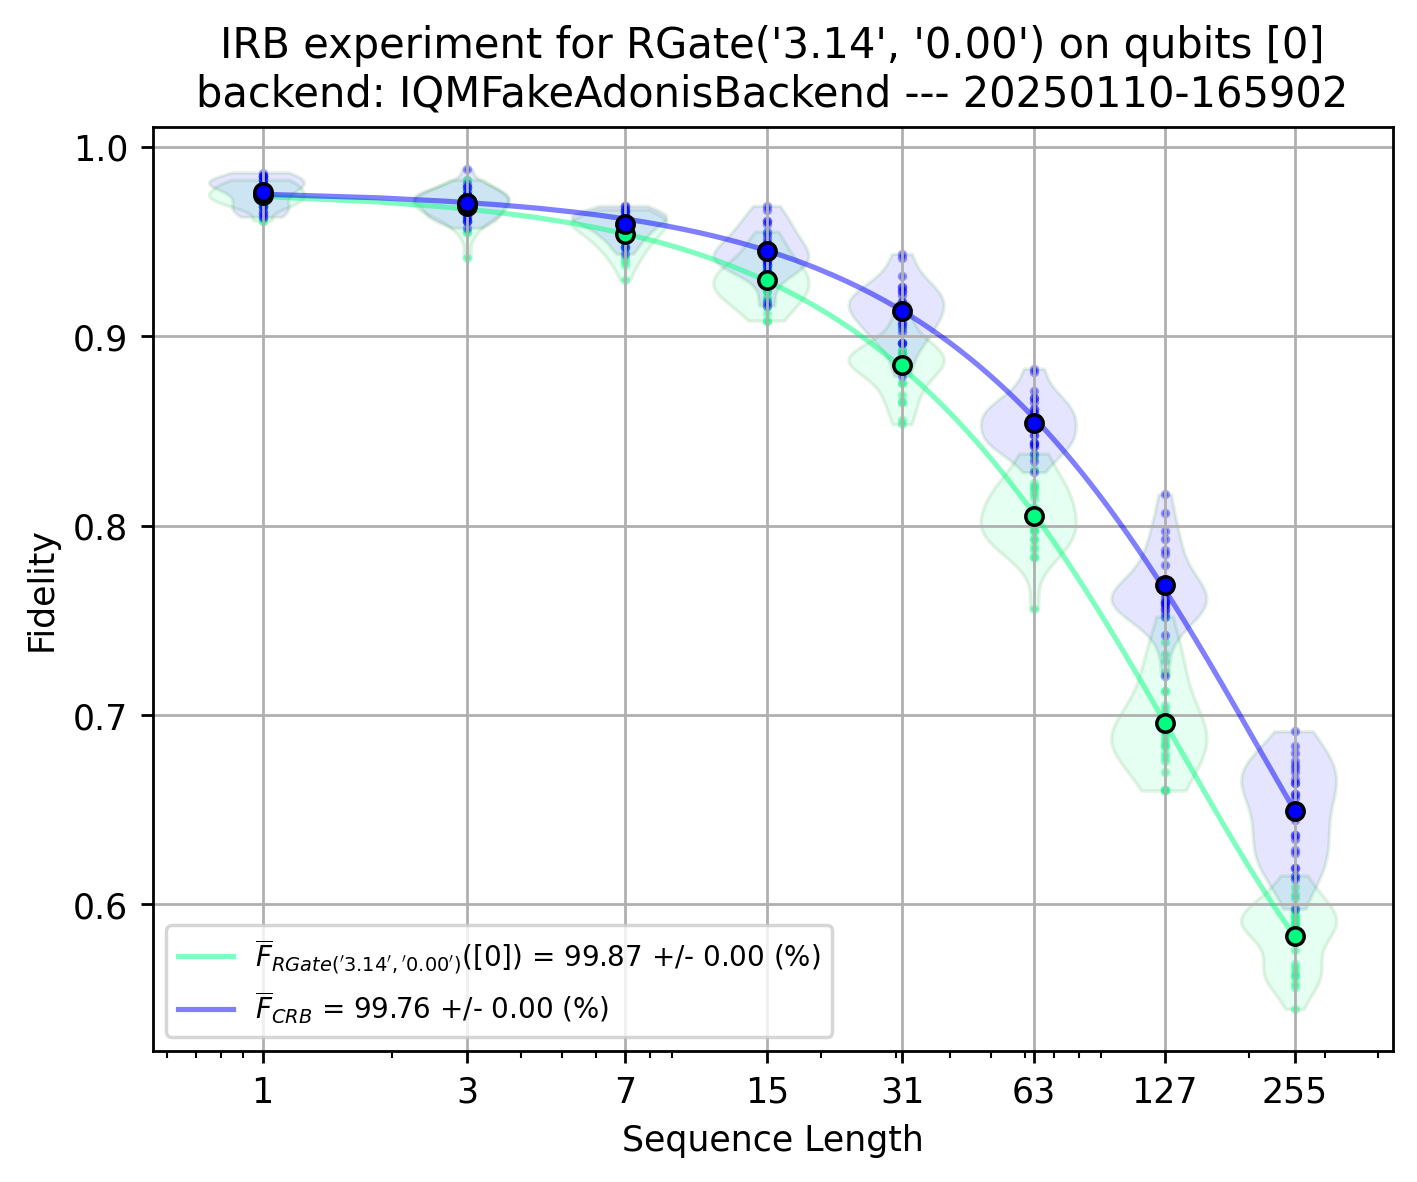

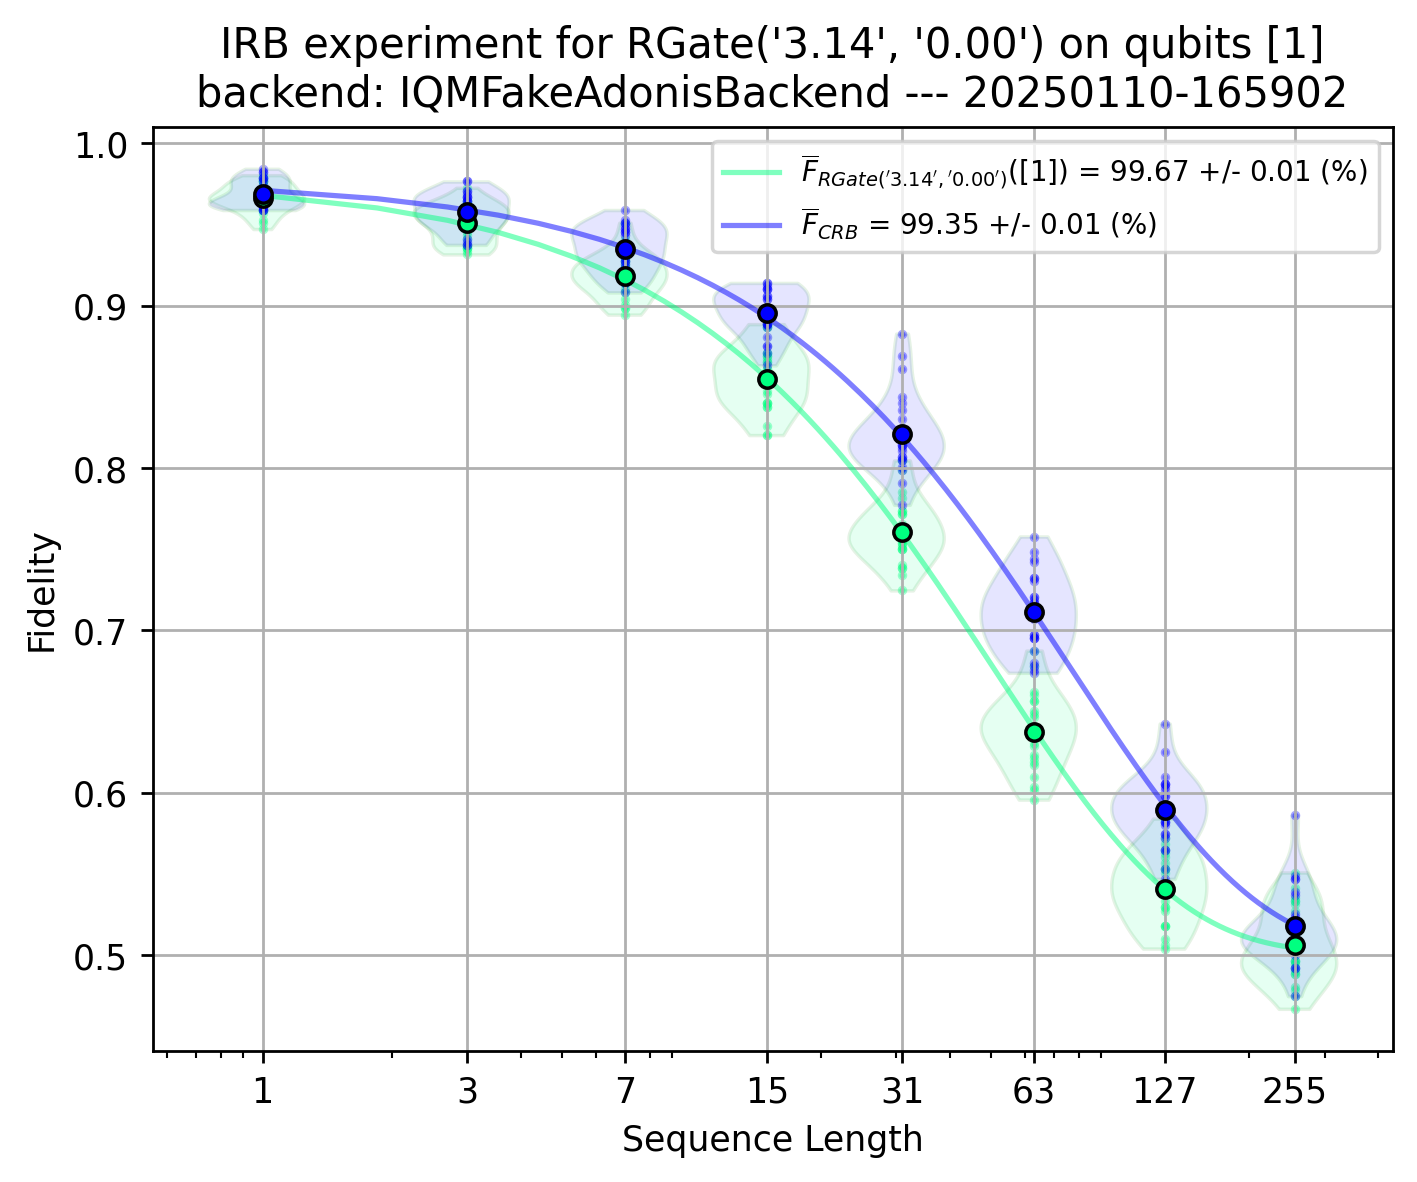

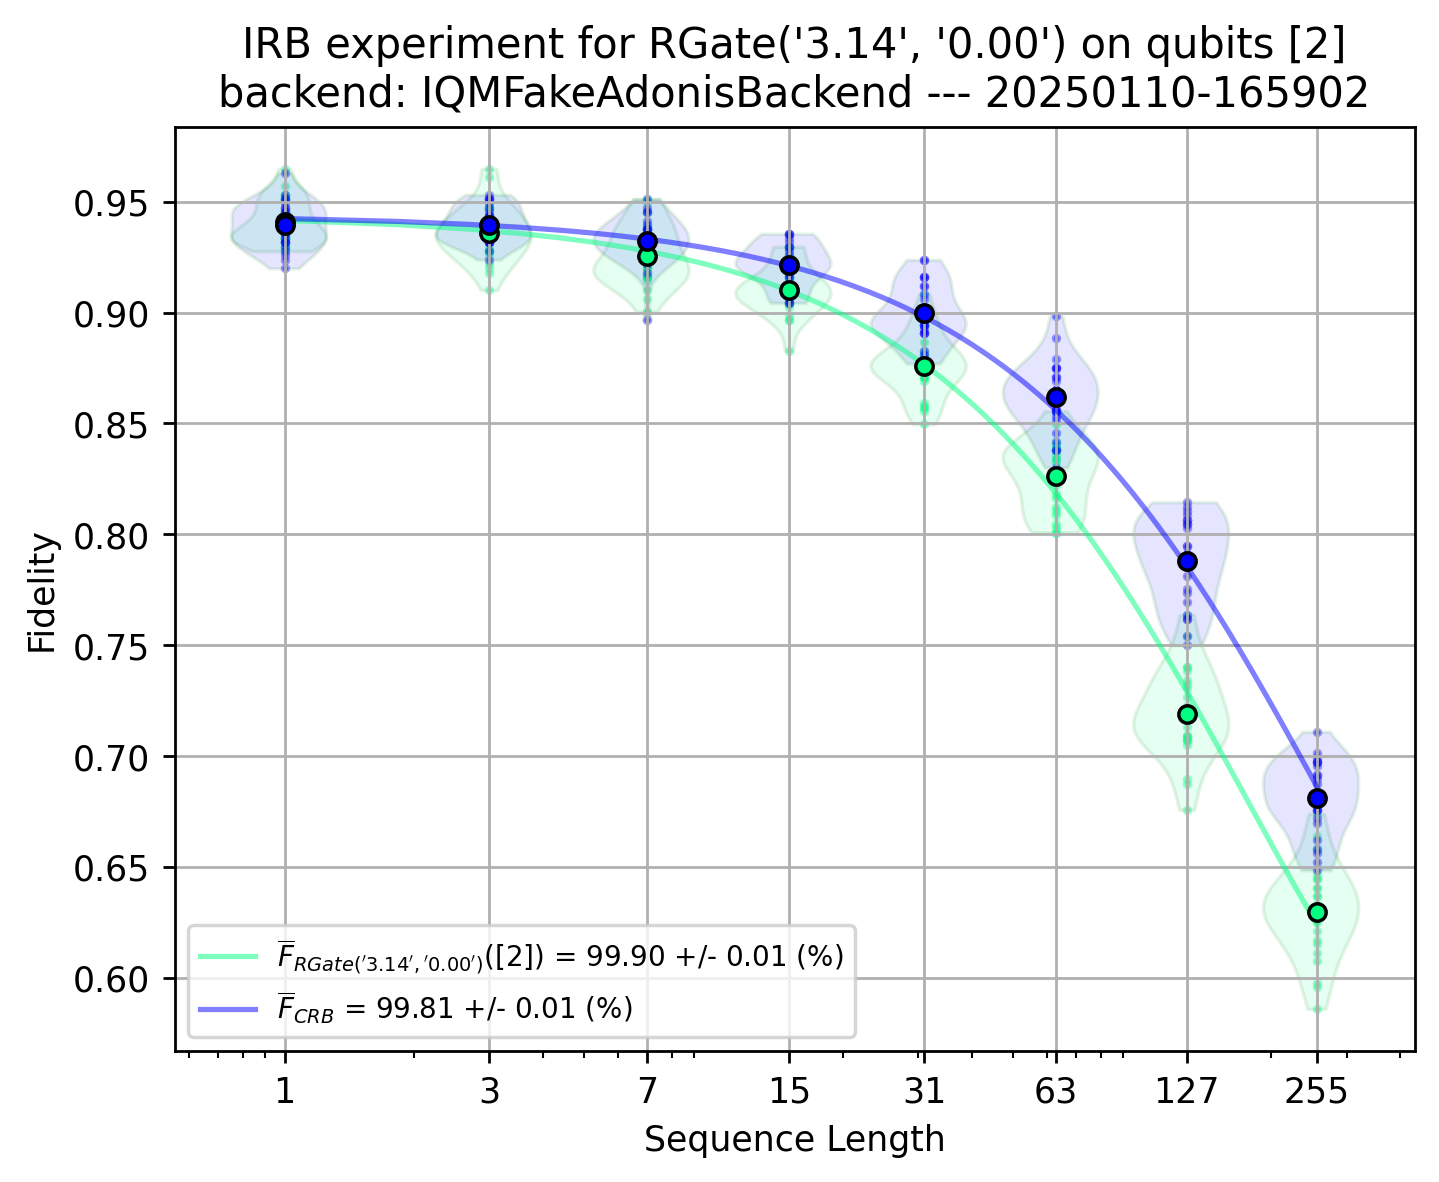

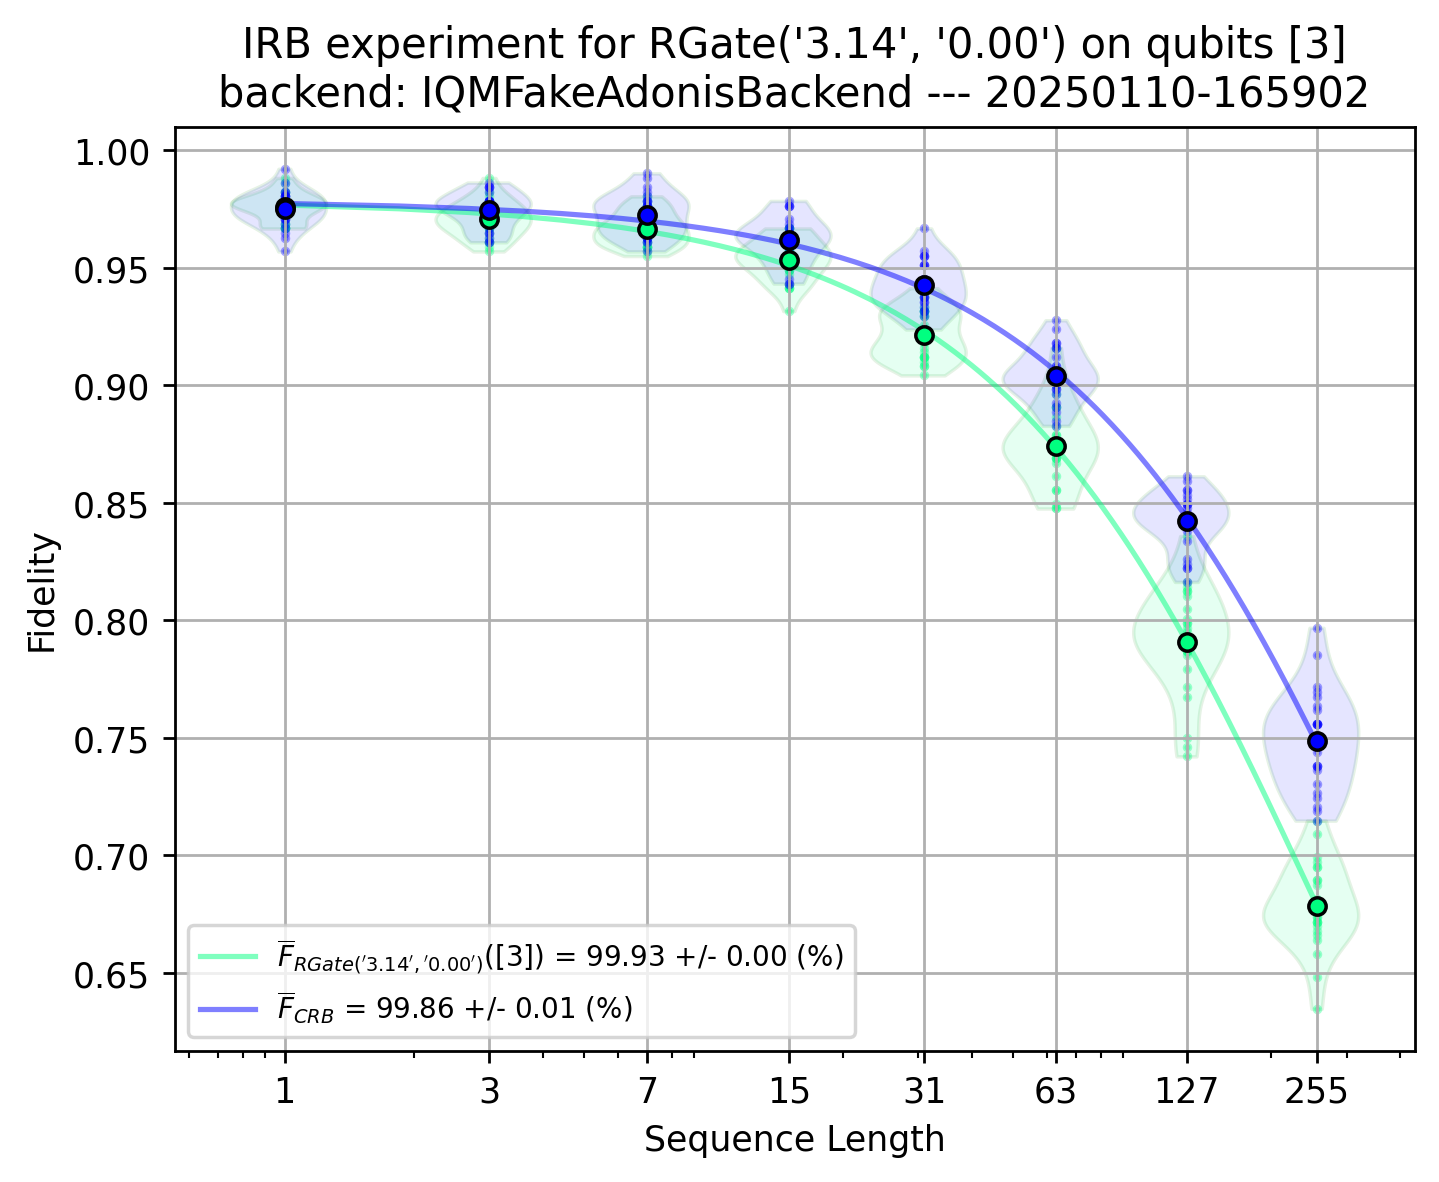

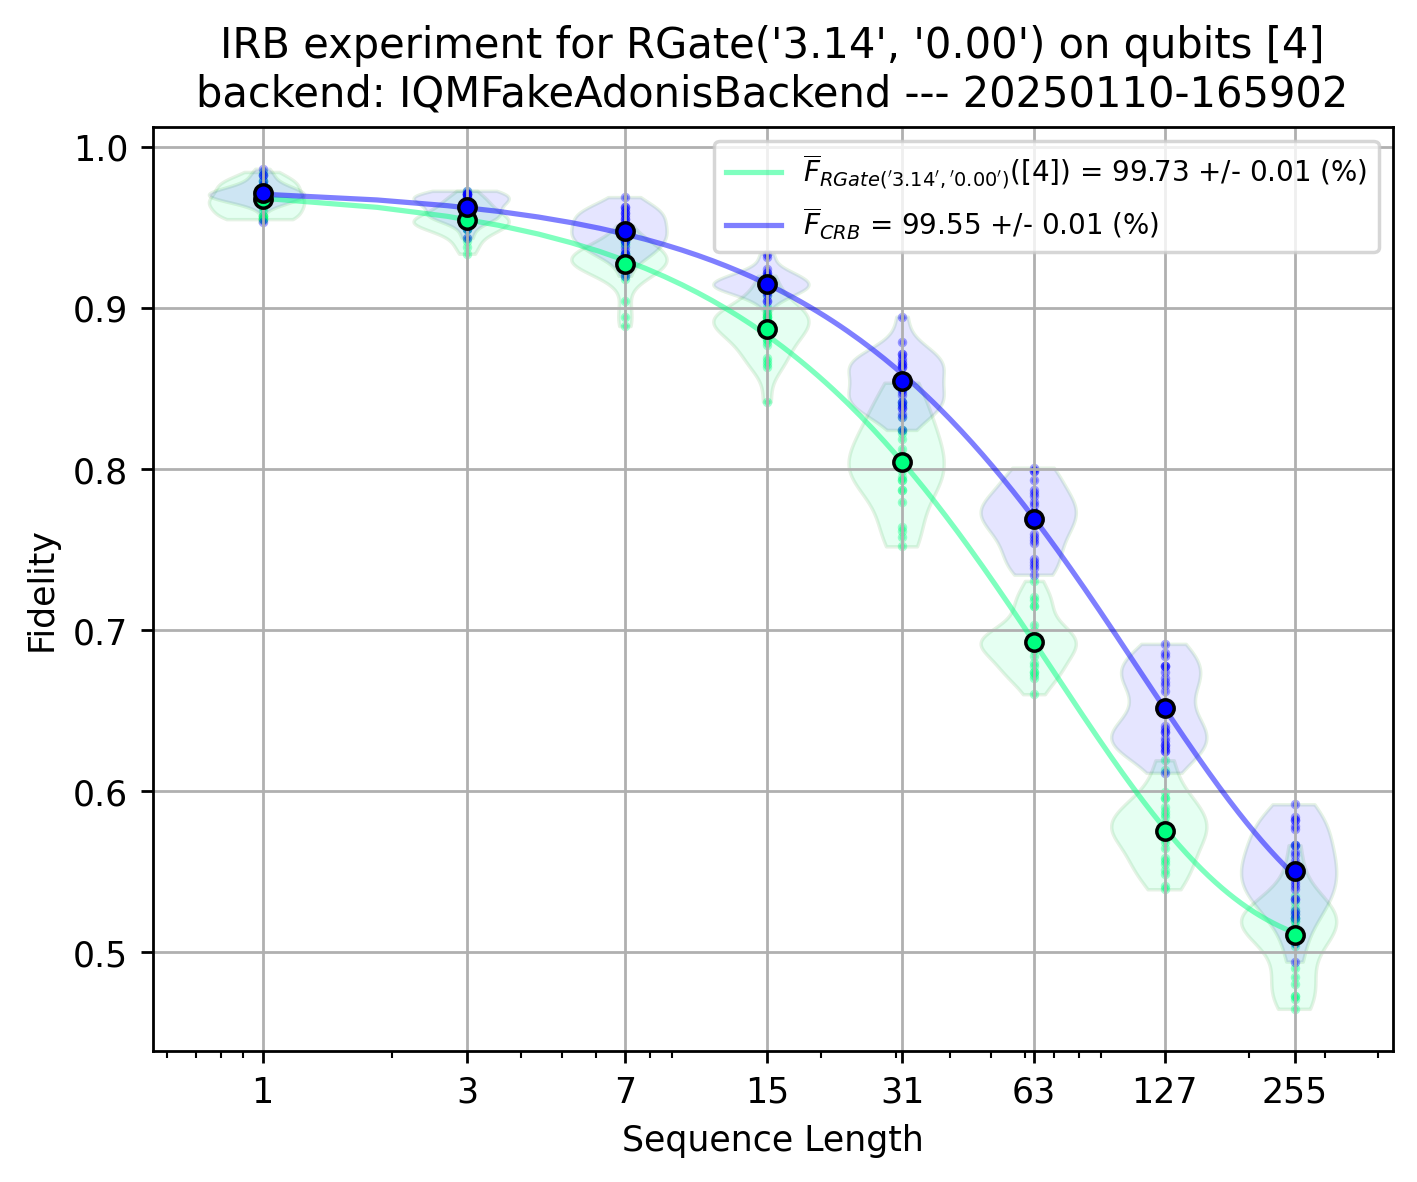

In [15]:
for v in result_irb_1Q.plots.values():
    display(v)

In [16]:
EXAMPLE_IRB_2Q = InterleavedRBConfiguration(
    qubits_array=[[0,2],[1,2],[2,3],[2,4]],
    sequence_lengths=[2**(m+1)-1 for m in range(7)],
    num_circuit_samples=25,
    shots=2**8,
    calset_id=None,
    parallel_execution=False,
    interleaved_gate = "CZGate",
    interleaved_gate_params = None,
    simultaneous_fit = ["amplitude", "offset"],
)

In [17]:
benchmark_irb_2Q = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_2Q)
run_irb_2Q = benchmark_irb_2Q.run()

2025-01-10 17:04:06,918 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-01-10 17:04:06,921 - iqm.benchmarks.logging_config - INFO - Wxecuting sequential Clifford and Interleaved RB circuits on qubits [0, 2]. Will generate and submit all 25 Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127]
2025-01-10 17:04:06,921 - iqm.benchmarks.logging_config - INFO - Now at sequence length 1
2025-01-10 17:04:07,001 - iqm.benchmarks.logging_config - INFO - Now at sequence length 3
2025-01-10 17:04:07,164 - iqm.benchmarks.logging_config - INFO - Now at sequence length 7
2025-01-10 17:04:07,481 - iqm.benchmarks.logging_config - INFO - Now at sequence length 15
2025-01-10 17:04:08,094 - iqm.benchmarks.logging_config - INFO - Now at sequence length 31
2025-01-10 17:04:09,367 - iqm.benchmarks.logging_config - INFO - Now at sequence length 63
2025-01-10 17:04:11,907 - iqm.benchmarks.logging_config - INFO - Now at sequence length 127
2025-01-10 17:04:1

In [18]:
result_irb_2Q = benchmark_irb_2Q.analyze()

2025-01-10 17:09:36,611 - iqm.benchmarks.logging_config - INFO - Post-processing sequential Interleaved RB for qubits [[0, 2], [1, 2], [2, 3], [2, 4]]
2025-01-10 17:09:36,642 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 1
2025-01-10 17:09:36,673 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 3
2025-01-10 17:09:36,704 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 7
2025-01-10 17:09:36,734 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 15
2025-01-10 17:09:36,765 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 31
2025-01-10 17:09:36,795 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 63
2025-01-10 17:09:36,826 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 127
2025-01-10 17:09:36,858 - iqm.benchmark

{'interleaved': {'[0, 2]': 0.9742310809885095}, 'clifford': {'[0, 2]': 0.9459834045099638}}
[0, 2]
clifford
{'interleaved': {'[1, 2]': 0.9702389918426017}, 'clifford': {'[1, 2]': 0.9373183372682623}}
[1, 2]
clifford
{'interleaved': {'[2, 3]': 0.9829862612568532}, 'clifford': {'[2, 3]': 0.9651704260970525}}
[2, 3]
clifford
{'interleaved': {'[2, 4]': 0.9600628980342876}, 'clifford': {'[2, 4]': 0.9331175707494691}}
[2, 4]
clifford


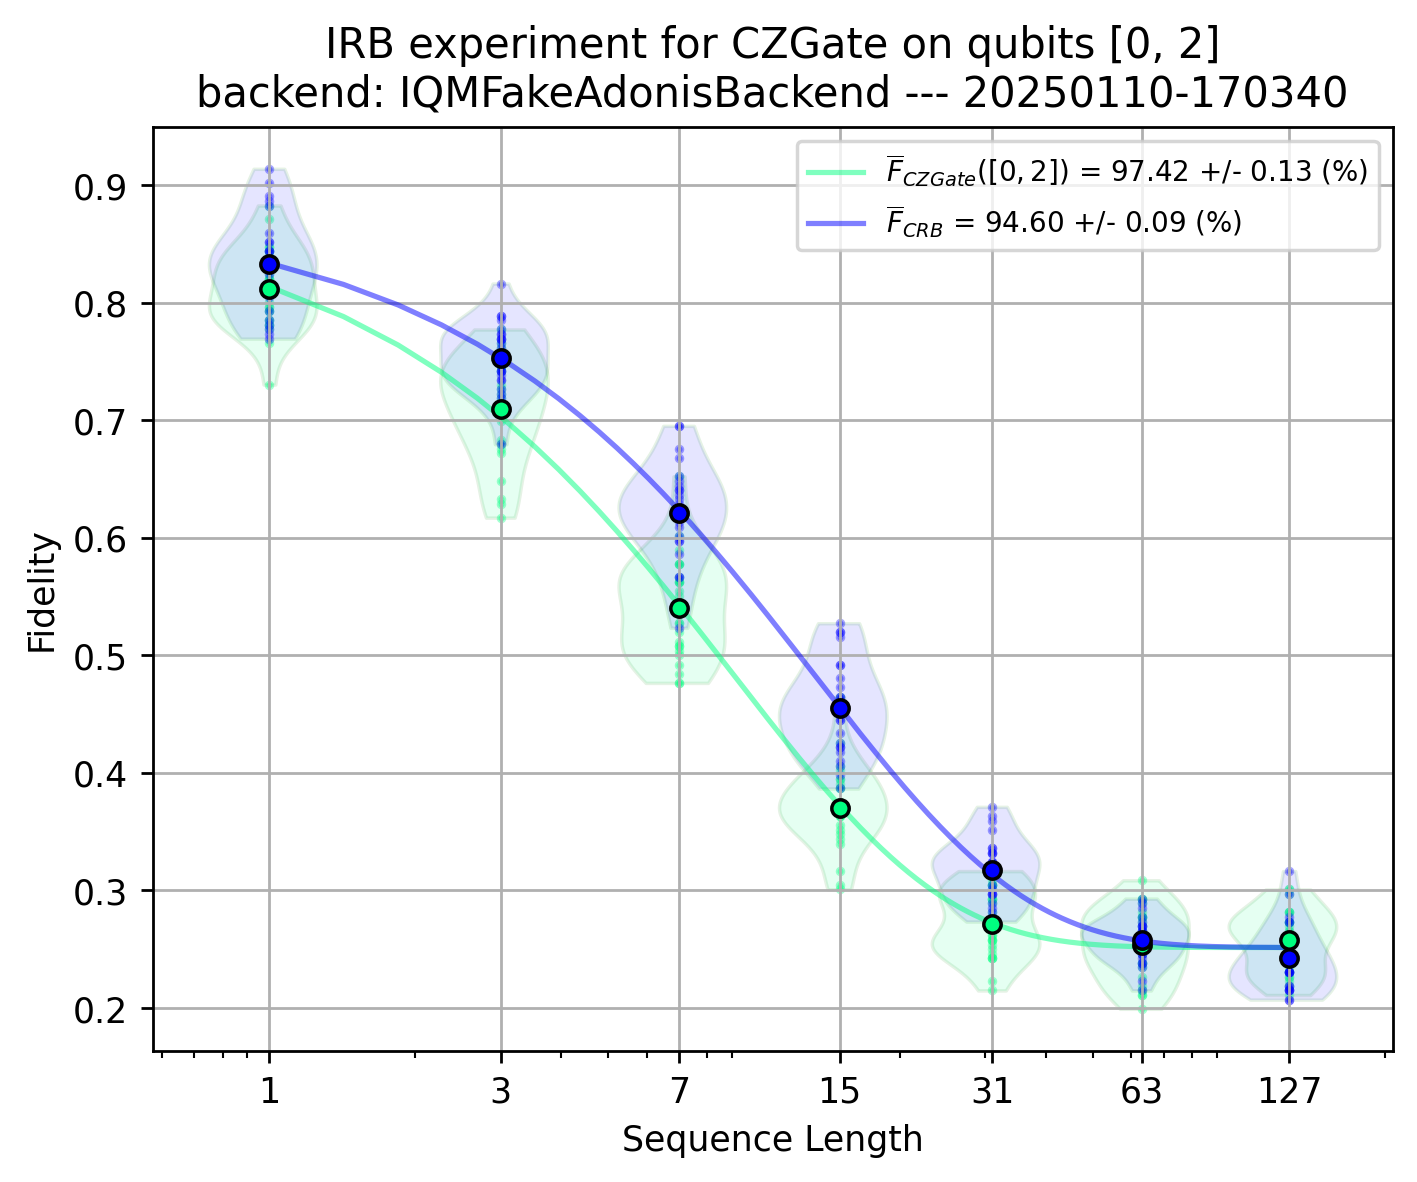

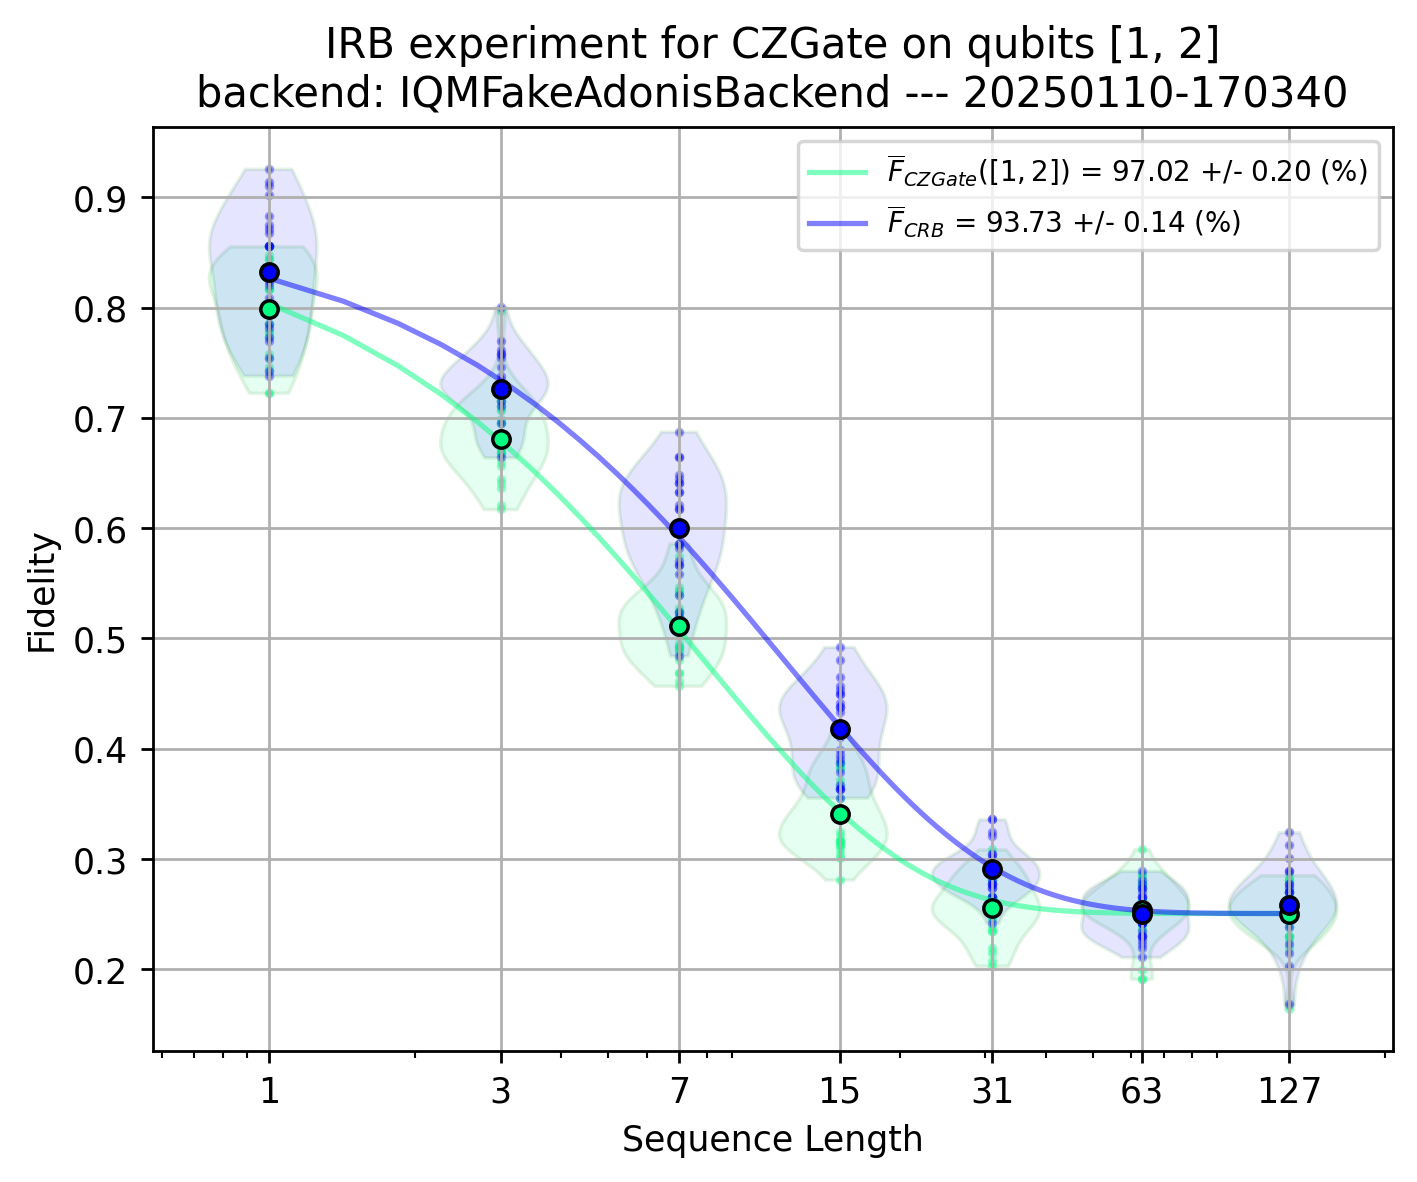

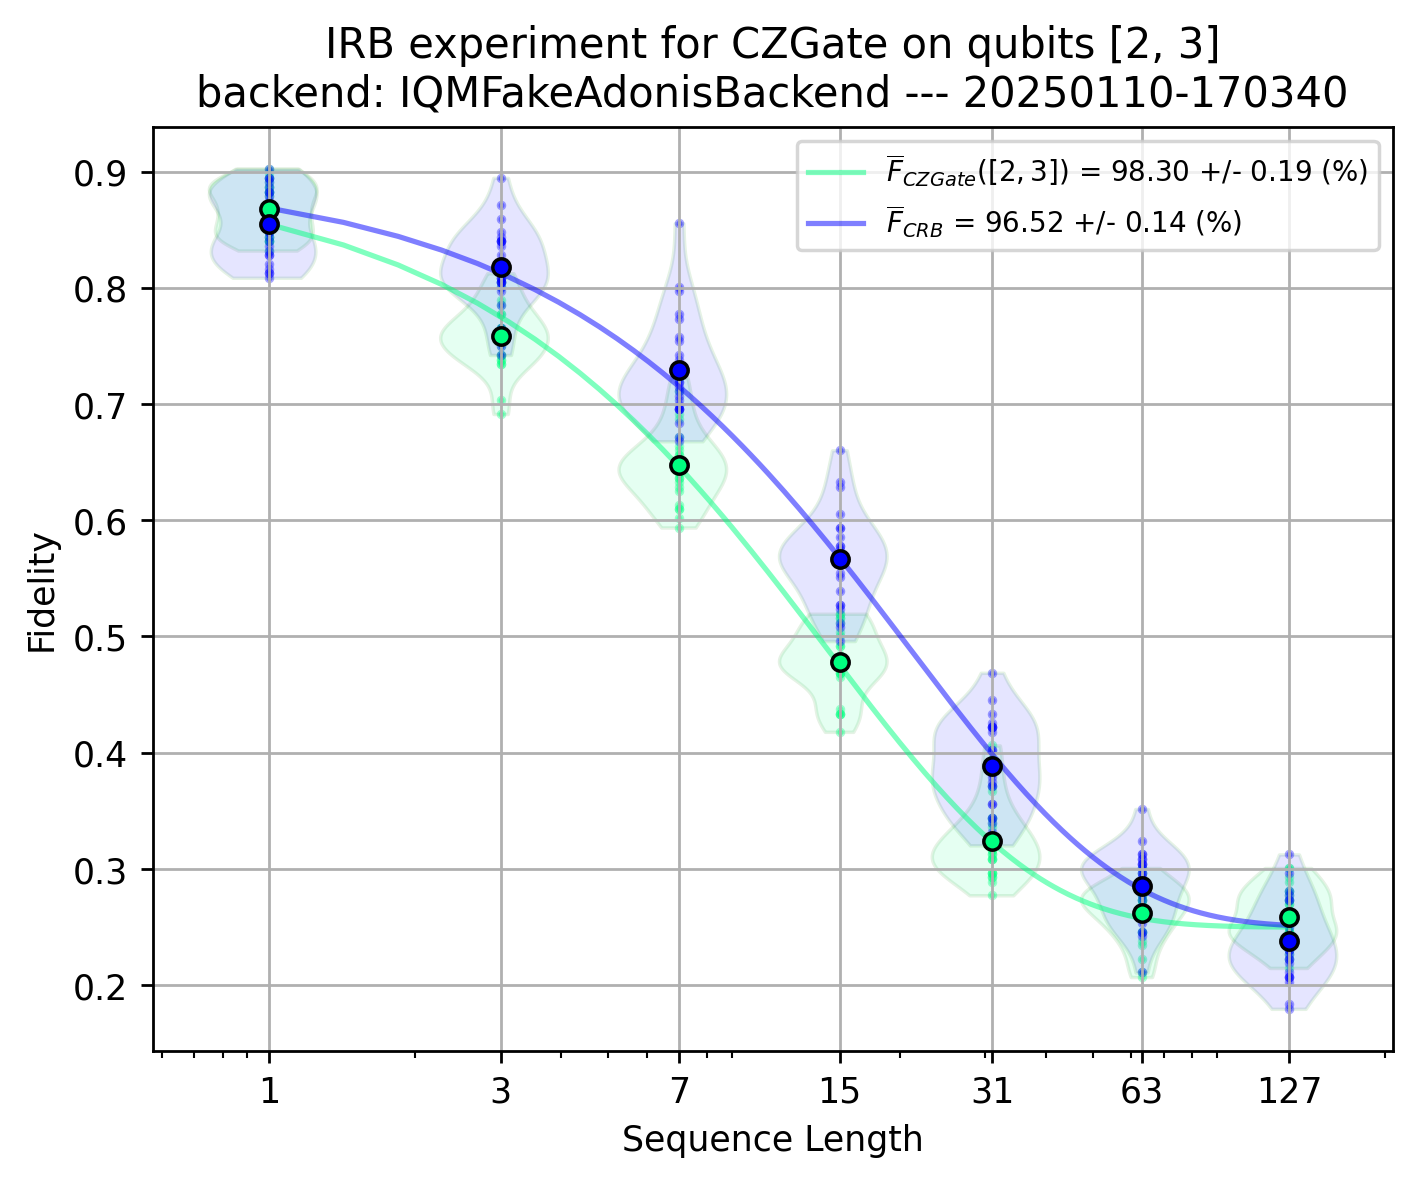

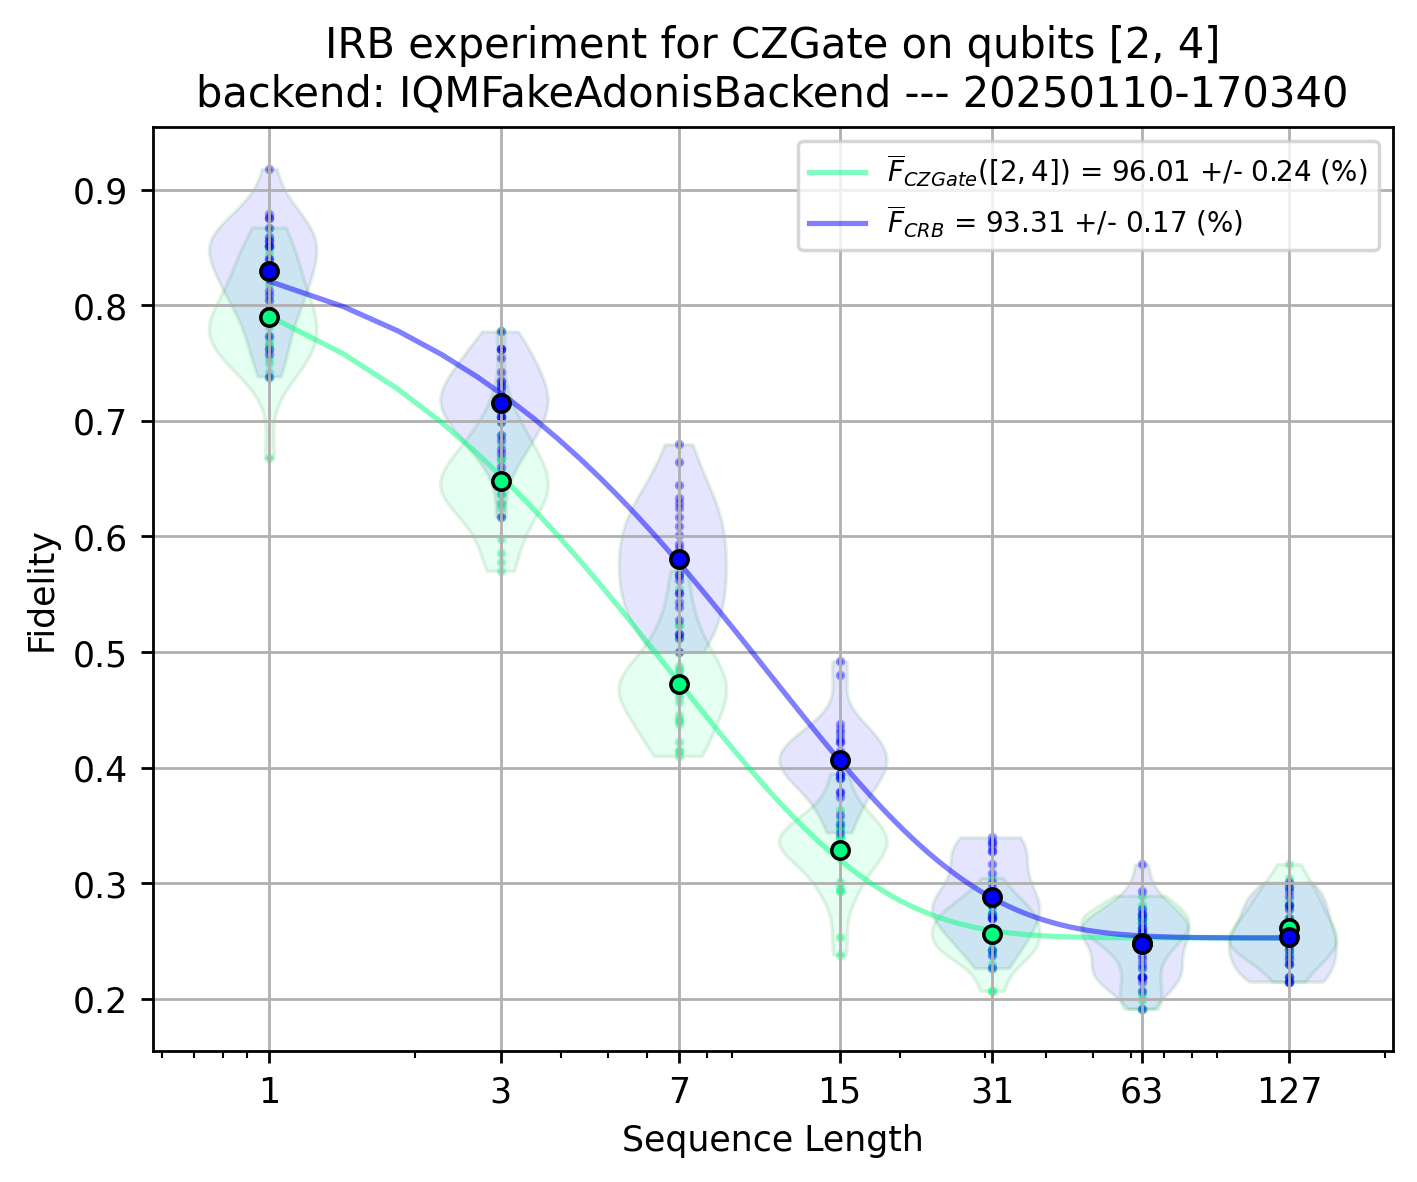

In [19]:
for plot in result_irb_2Q.plots.values():
    display(plot)

In [20]:
EXAMPLE_IRB_iswap = InterleavedRBConfiguration(
    qubits_array=[[0,2],[1,2]],
    sequence_lengths=[2**(m+1)-1 for m in range(7)],
    num_circuit_samples=30,
    shots=2**10,
    calset_id=None,
    parallel_execution=False,
    interleaved_gate = "iSwapGate",
    interleaved_gate_params = None,
    simultaneous_fit = ["amplitude", "offset"],
)

In [21]:
benchmark_irb_iswap = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_iswap)
run_irb_iswap = benchmark_irb_iswap.run()

2025-01-10 17:11:22,446 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-01-10 17:11:22,465 - iqm.benchmarks.logging_config - INFO - Wxecuting sequential Clifford and Interleaved RB circuits on qubits [0, 2]. Will generate and submit all 30 Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127]
2025-01-10 17:11:22,466 - iqm.benchmarks.logging_config - INFO - Now at sequence length 1
2025-01-10 17:11:22,567 - iqm.benchmarks.logging_config - INFO - Now at sequence length 3
2025-01-10 17:11:22,751 - iqm.benchmarks.logging_config - INFO - Now at sequence length 7
2025-01-10 17:11:23,122 - iqm.benchmarks.logging_config - INFO - Now at sequence length 15
2025-01-10 17:11:23,904 - iqm.benchmarks.logging_config - INFO - Now at sequence length 31
2025-01-10 17:11:25,470 - iqm.benchmarks.logging_config - INFO - Now at sequence length 63
2025-01-10 17:11:28,573 - iqm.benchmarks.logging_config - INFO - Now at sequence length 127
2025-01-10 17:11:3

In [22]:
result_irb_iswap = benchmark_irb_iswap.analyze()

2025-01-10 17:16:08,774 - iqm.benchmarks.logging_config - INFO - Post-processing sequential Interleaved RB for qubits [[0, 2], [1, 2]]
2025-01-10 17:16:08,796 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 1
2025-01-10 17:16:08,817 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 3
2025-01-10 17:16:08,838 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 7
2025-01-10 17:16:08,860 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 15
2025-01-10 17:16:08,881 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 31
2025-01-10 17:16:08,902 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 63
2025-01-10 17:16:08,924 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 2] and depth 127
2025-01-10 17:16:08,945 - iqm.benchmarks.logging_config

{'interleaved': {'[0, 2]': 0.9296485294294863}, 'clifford': {'[0, 2]': 0.9468865104887559}}
[0, 2]
clifford
{'interleaved': {'[1, 2]': 0.9168663709049512}, 'clifford': {'[1, 2]': 0.9389212110918619}}
[1, 2]
clifford


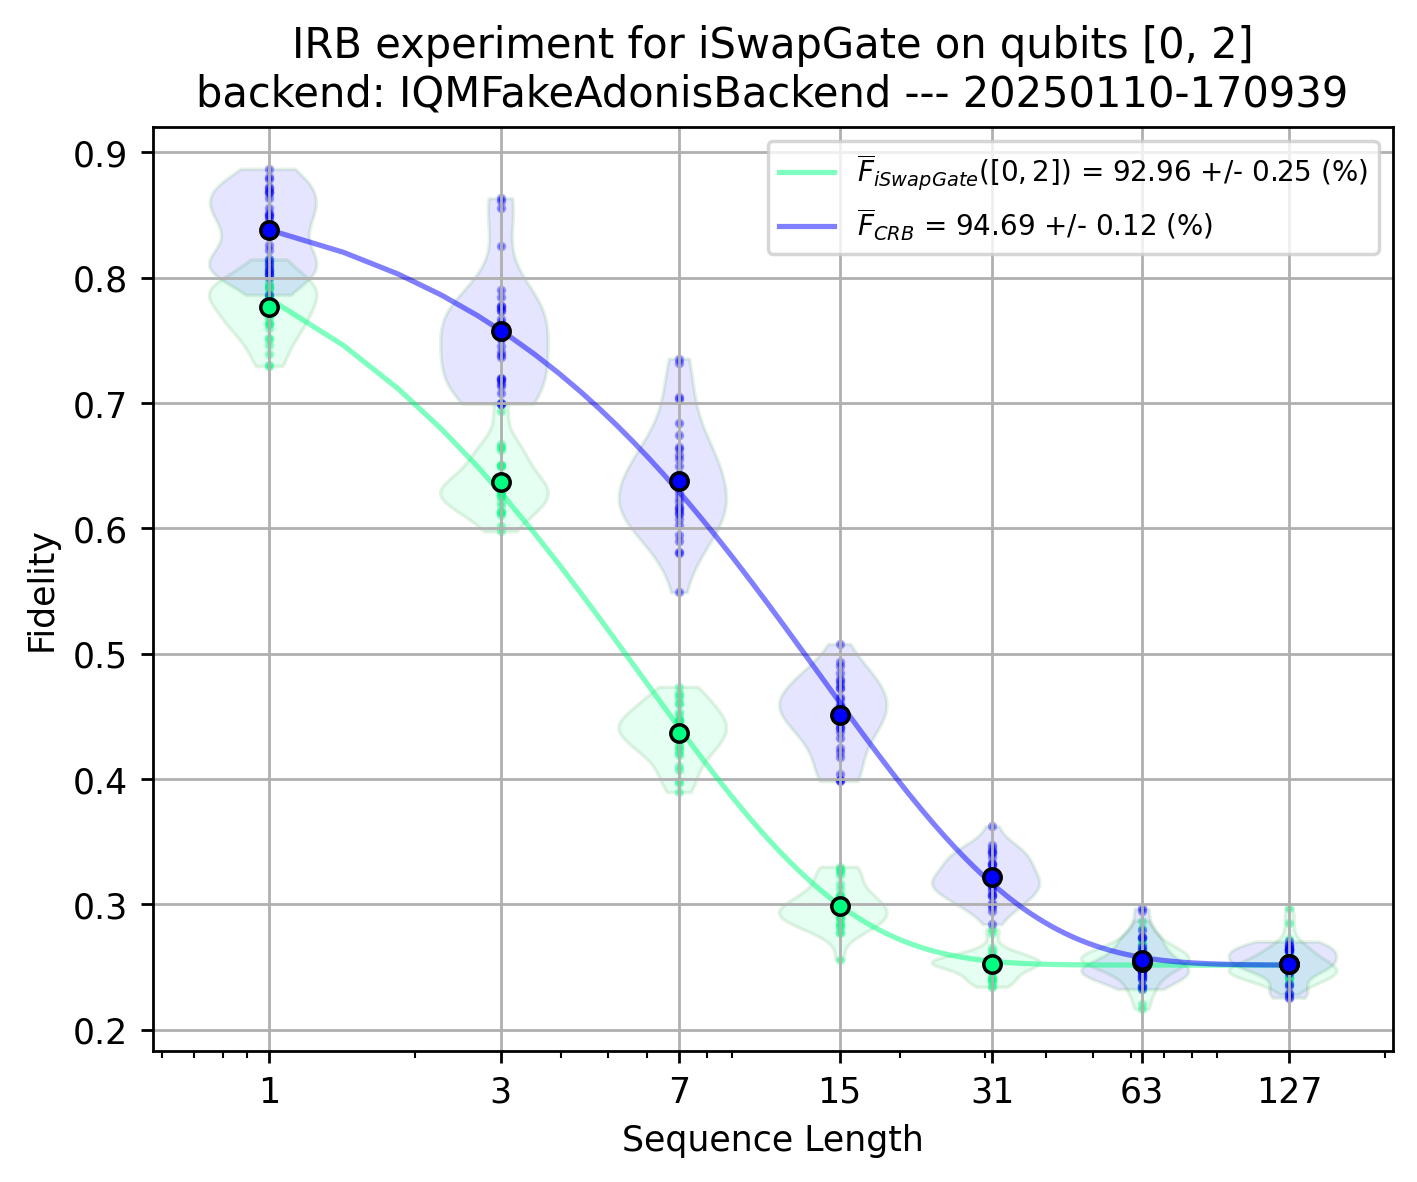

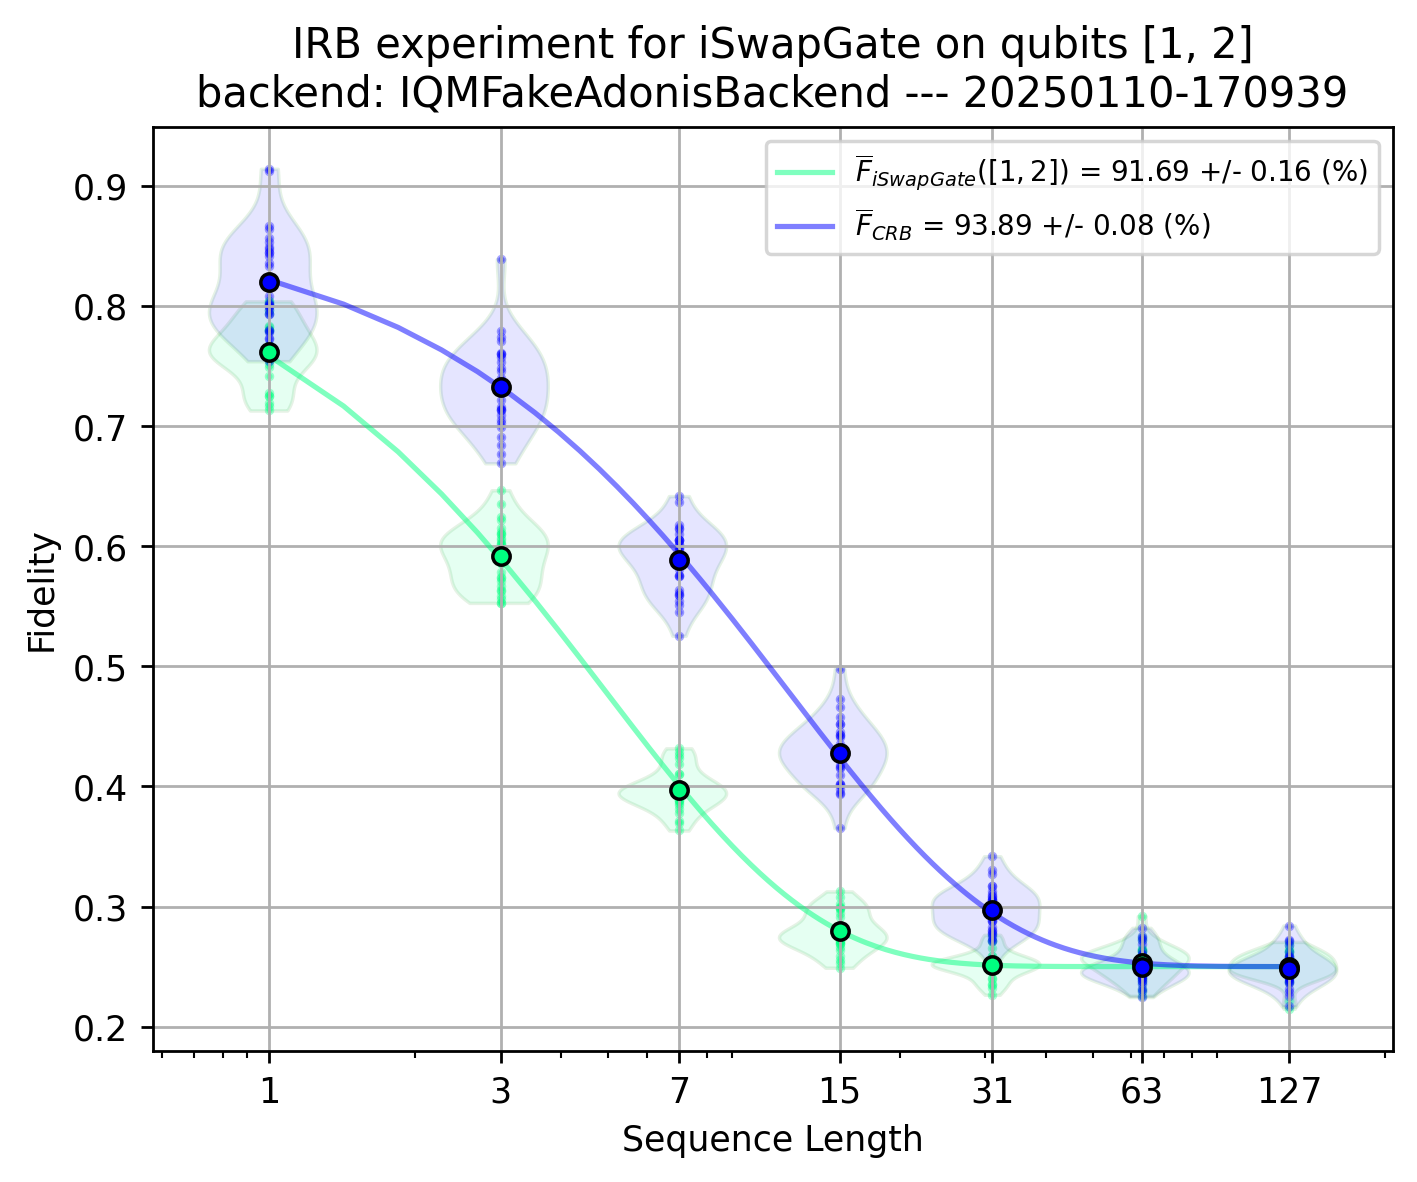

In [23]:
for plot in result_irb_iswap.plots.values():
    display(plot)

## Mirror Randomized Benchmarking

In [24]:
from iqm.benchmarks.randomized_benchmarking.mirror_rb.mirror_rb import *

In [25]:
EXAMPLE_MRB = MirrorRBConfiguration(
    qubits_array=[[0,2],
                  [0,1,2]],
                  # [0,1,2,3],
                  # [0,1,2,3,4]],
                  #[0,1,3,4,8,9,13,14]],
                  # [0,1,3,4,8,9,13,14,17,18],
                  # [0,1,3,4,8,9,13,14,17,18,2,7],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10,6,11]],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10,6,11,15,16],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10,6,11,15,16,12,19]],
    depths_array=[[2**m for m in range(9)],
                  [2**m for m in range(8)]],
                  # [2**m for m in range(7)],
                  # [2**m for m in range(6)]],
                  # [2**(m+1)-1 for m in range(6)],
                  # [2**(m+1)-1 for m in range(6)],
                  # [2**(m+1)-1 for m in range(5)],
                  # [2**(m+1)-1 for m in range(5)],
                  # [2**(m+1)-1 for m in range(4)],
                  # [2**(m+1)-1 for m in range(4)]],
    num_circuit_samples=10,
    num_pauli_samples=5,
    shots=2**8,
    qiskit_optim_level=1,
    routing_method="sabre",
    two_qubit_gate_ensemble={"CZGate": 0.8, "iSwapGate": 0.2},
    density_2q_gates=0.25,
    calset_id=None,
)

In [26]:
benchmark_mrb = MirrorRandomizedBenchmarking(backend, EXAMPLE_MRB)
run_mrb = benchmark_mrb.run()

2025-01-10 17:16:09,984 - iqm.benchmarks.logging_config - INFO - Executing MRB on qubits [0, 2]. Will generate and submit all 10x5 MRB circuits for each depth [2, 4, 8, 16, 32, 64, 128, 256, 512]
2025-01-10 17:16:09,984 - iqm.benchmarks.logging_config - INFO - Depth 2 - Generating all circuits
2025-01-10 17:16:14,481 - iqm.benchmarks.logging_config - INFO - Submitting batch with 50 circuits corresponding to qubits [0, 2]
2025-01-10 17:16:14,496 - iqm.benchmarks.logging_config - INFO - Job for layout [0, 2] & depth 2 submitted successfully!
2025-01-10 17:16:14,547 - iqm.benchmarks.logging_config - INFO - Depth 4 - Generating all circuits
2025-01-10 17:16:19,090 - iqm.benchmarks.logging_config - INFO - Submitting batch with 50 circuits corresponding to qubits [0, 2]
2025-01-10 17:16:19,109 - iqm.benchmarks.logging_config - INFO - Job for layout [0, 2] & depth 4 submitted successfully!
2025-01-10 17:16:19,165 - iqm.benchmarks.logging_config - INFO - Depth 8 - Generating all circuits
2025-

In [27]:
result_mrb = benchmark_mrb.analyze()

2025-01-10 18:04:51,246 - iqm.benchmarks.logging_config - INFO - Post-processing MRB for qubits [0, 2]
2025-01-10 18:04:51,283 - iqm.benchmarks.logging_config - INFO - Depth 2
2025-01-10 18:04:51,283 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-01-10 18:04:51,374 - iqm.benchmarks.logging_config - INFO - Depth 4
2025-01-10 18:04:51,374 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-01-10 18:04:51,460 - iqm.benchmarks.logging_config - INFO - Depth 8
2025-01-10 18:04:51,460 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-01-10 18:04:51,542 - iqm.benchmarks.logging_config - INFO - Depth 16
2025-01-10 18:04:51,542 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-01-10 18:04:51,626 - iqm.benchmarks.logging_config - INFO - Depth 32
2025-01-10 18:04:51,626 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-01-10 18:04:51,706 - iqm.benchmarks.logging_config - INFO - Depth 64
2

In [28]:
result_mrb.plots

{'[0, 2]': <Figure size 1600x1200 with 1 Axes>,
 '[0, 1, 2]': <Figure size 1600x1200 with 1 Axes>,
 'all_qubit_layouts': <Figure size 1600x1200 with 1 Axes>}

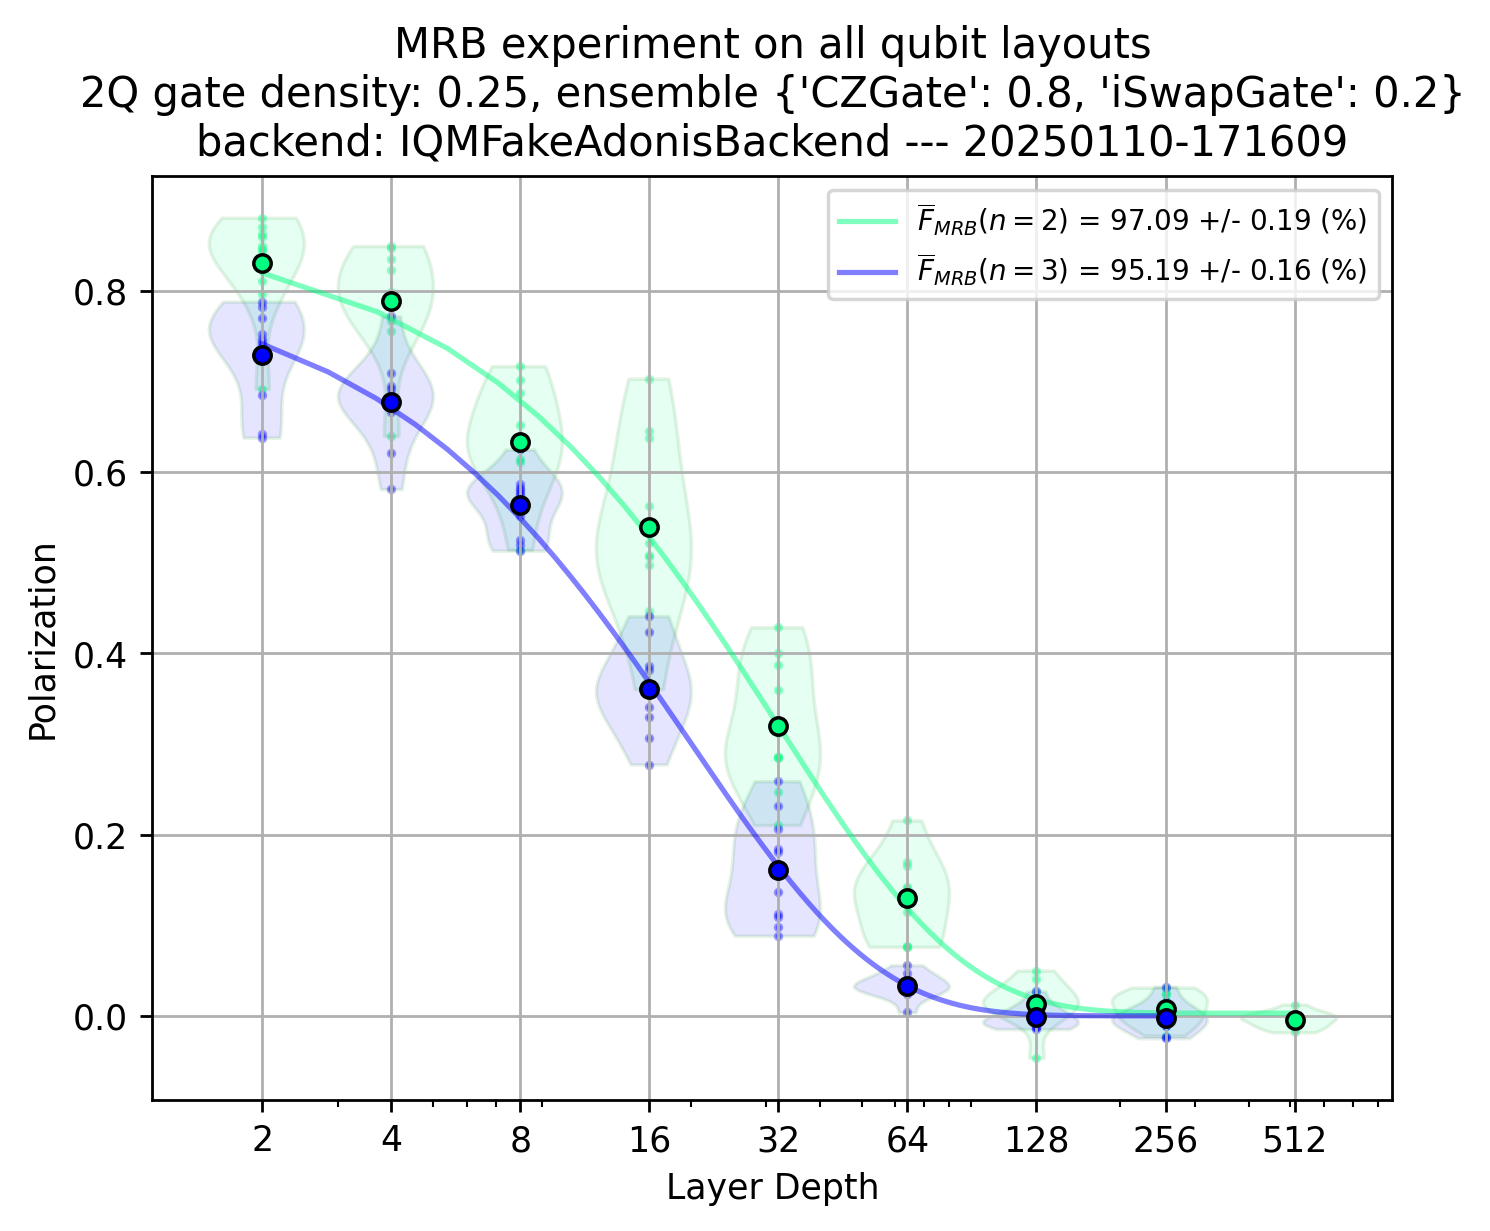

In [29]:
key_mrb_plot = "all_qubit_layouts"
result_mrb.plot(key_mrb_plot)

## Quantum Volume

In [30]:
from iqm.benchmarks.quantum_volume.quantum_volume import *

In [31]:
EXAMPLE_QV = QuantumVolumeConfiguration(
    num_circuits=500,
    shots=2**8,
    calset_id=None,
    num_sigmas=2,
    choose_qubits_routine="custom",
    custom_qubits_array=[[0,1,2,3], [0,1,2,3,4]],#, [0,1,3,4,5]],
    qiskit_optim_level=3,
    optimize_sqg=True,
    max_gates_per_batch=60_000,
    rem=True,
    mit_shots=1_000,
)

In [32]:
benchmark_qv = QuantumVolumeBenchmark(backend, EXAMPLE_QV)
run0_qv = benchmark_qv.run()

2025-01-10 18:04:53,115 - iqm.benchmarks.logging_config - INFO - Executing QV on qubits [0, 1, 2, 3]
2025-01-10 18:04:53,365 - iqm.benchmarks.logging_config - INFO - Successfully generated all 500 circuits to be executed
2025-01-10 18:04:53,366 - iqm.benchmarks.logging_config - INFO - Will transpile according to "fixed" physical layout
2025-01-10 18:04:53,367 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeAdonisBackend with optimization level 3, sabre routing method and SQG optimization all circuits
2025-01-10 18:05:04,219 - iqm.benchmarks.logging_config - INFO - Submitting batch with 500 circuits corresponding to qubits [0, 1, 2, 3]
2025-01-10 18:05:04,234 - iqm.benchmarks.logging_config - INFO - max_gates_per_batch restriction: submitting subbatch #1 with 500 circuits corresponding to qubits [0, 1, 2, 3]
2025-01-10 18:05:04,562 - iqm.benchmarks.logging_config - INFO - Job for layout [0, 1, 2, 3] submitted successfully!
2025-01-10 18:05:04,588 - iqm.benchmarks

In [33]:
result0_qv = benchmark_qv.analyze()

2025-01-10 18:05:24,698 - iqm.benchmarks.logging_config - INFO - Noiseless simulation and post-processing for layout [0, 1, 2, 3]
2025-01-10 18:05:25,413 - iqm.benchmarks.logging_config - INFO - Noiseless simulation and post-processing for layout [0, 1, 2, 3, 4]
2025-01-10 18:05:26,174 - iqm.benchmarks.logging_config - INFO - REM post-processing for layout [0, 1, 2, 3] with 1000 shots
2025-01-10 18:05:26,208 - iqm.benchmarks.logging_config - INFO - REM post-processing for layout [0, 1, 2, 3, 4] with 1000 shots


In [34]:
#run1_qv = benchmark_qv.run()

In [35]:
#result1_qv = benchmark.analyze(run_index=0)

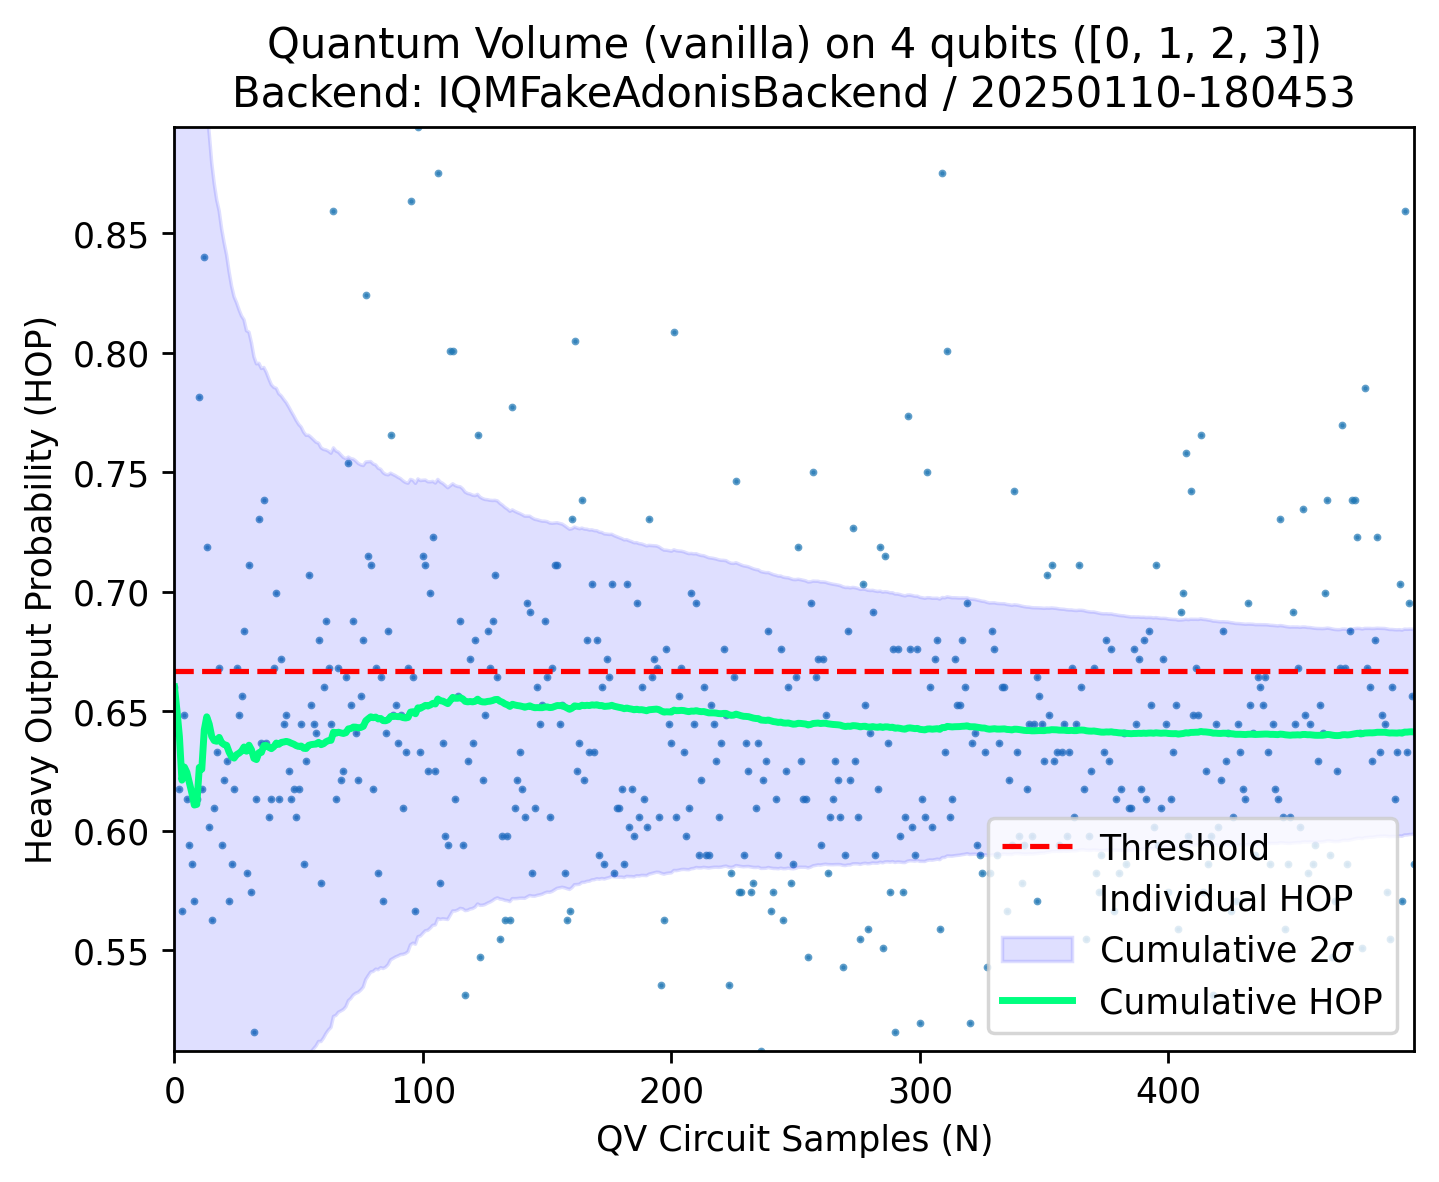

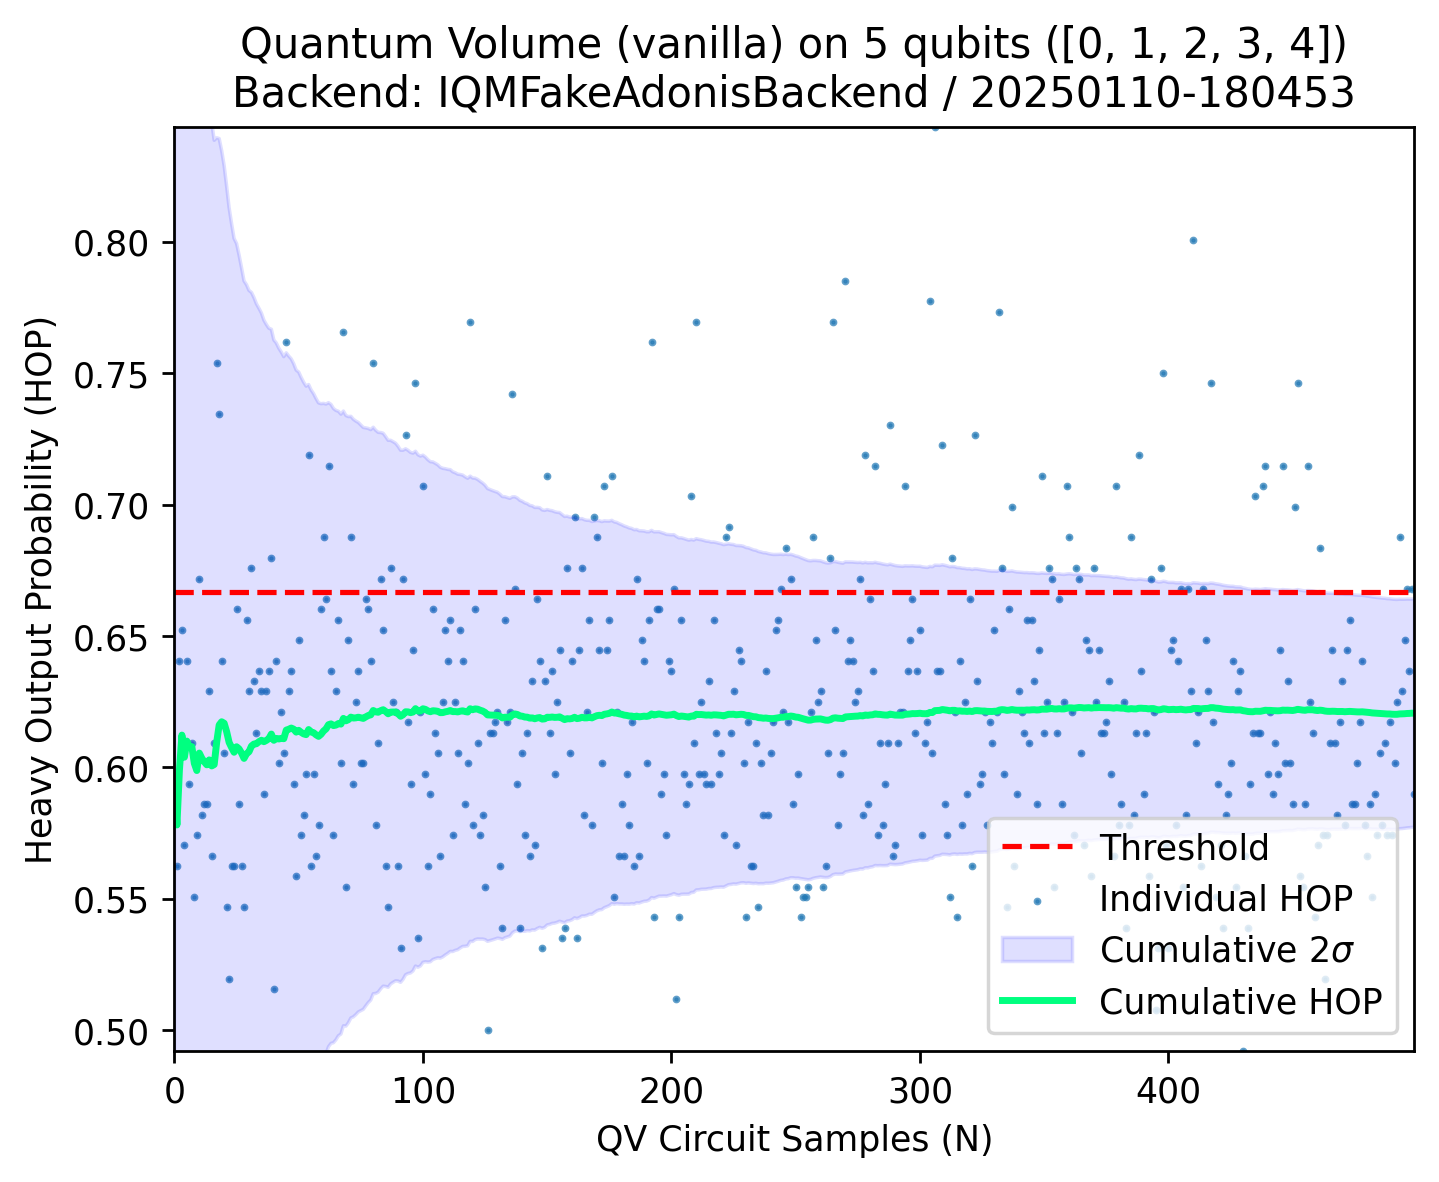

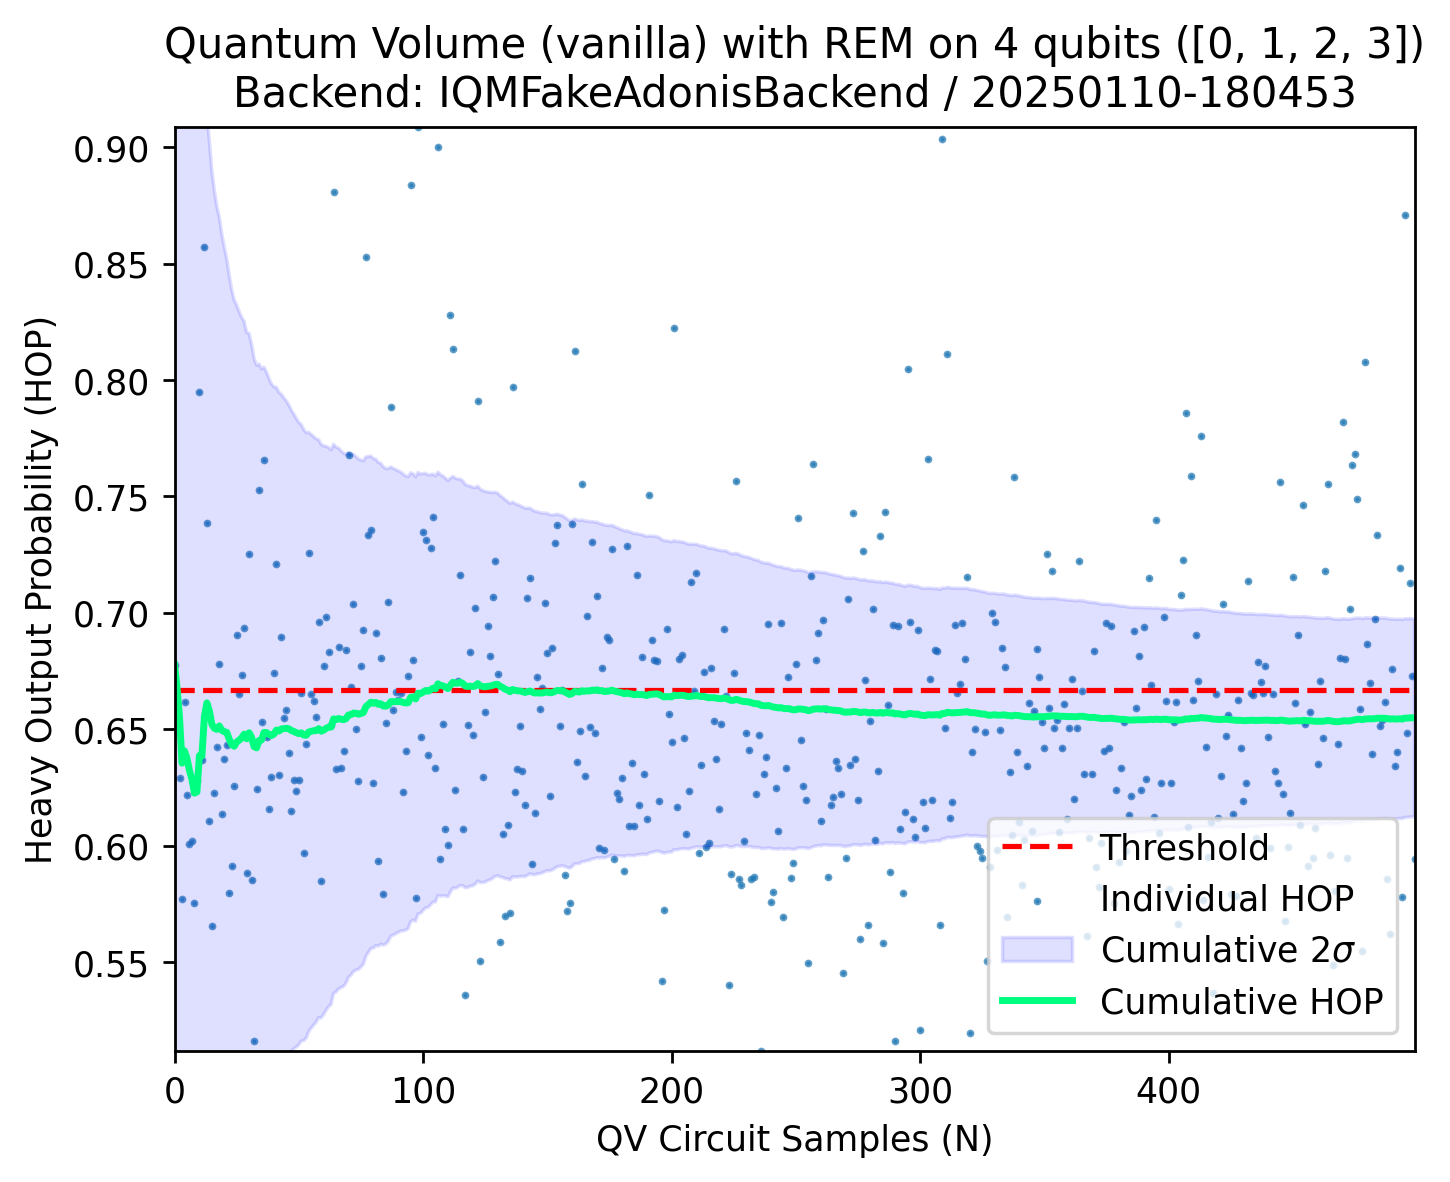

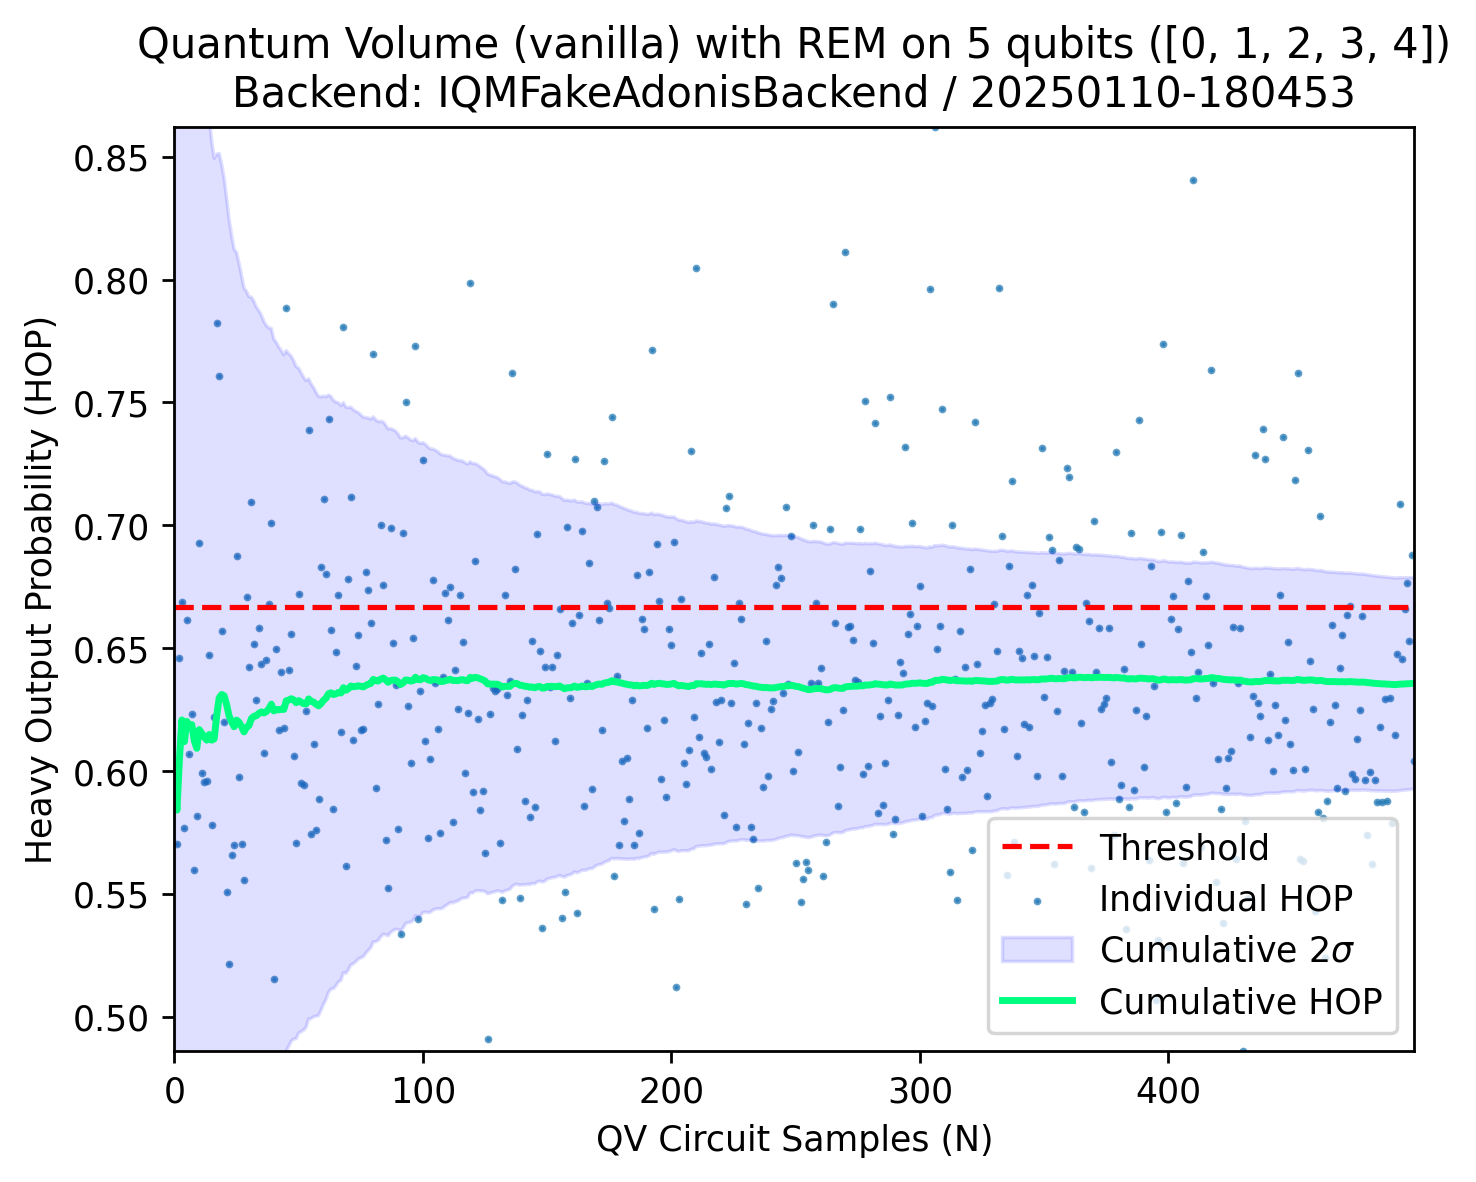

In [36]:
for v in result0_qv.plots.values():
    display(v)

## CLOPS

In [37]:
from iqm.benchmarks.quantum_volume.clops import *

In [38]:
EXAMPLE_CLOPS = CLOPSConfiguration(
    qubits=[0,1,2,3,4],
    num_circuits=100, # By definition set to 100
    num_updates=10, # By definition set to 10
    num_shots=100, # By definition set to 100
    calset_id=None,
    clops_h_bool=True,
    qiskit_optim_level=3,
    optimize_sqg=True,
    routing_method="sabre",
    physical_layout="fixed",
)

In [39]:
benchmark_clops = CLOPSBenchmark(backend, EXAMPLE_CLOPS)
run_clops = benchmark_clops.run()

2025-01-10 18:05:26,723 - iqm.benchmarks.logging_config - INFO - NB: CLOPS should be estimated with same qubit layout and optional inputs used to establish QV!
2025-01-10 18:05:26,723 - iqm.benchmarks.logging_config - INFO - Now generating 100 parametrized circuit templates on qubits [0, 1, 2, 3, 4]
2025-01-10 18:05:26,865 - iqm.benchmarks.logging_config - INFO - Will transpile all 100 circuits according to "fixed" physical layout
2025-01-10 18:05:26,865 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeAdonisBackend with optimization level 3, sabre routing method and SQG optimization all circuits
2025-01-10 18:05:32,033 - iqm.benchmarks.logging_config - INFO - CLOPS time started
2025-01-10 18:05:32,034 - iqm.benchmarks.logging_config - INFO - Update 1/10
Assigning random parameters to all 100 circuits
2025-01-10 18:05:33,673 - iqm.benchmarks.logging_config - INFO - Executing the corresponding circuit batch
2025-01-10 18:05:33,673 - iqm.benchmarks.logging_config -

In [40]:
result_clops = benchmark_clops.analyze()

2025-01-10 18:05:53,230 - iqm.benchmarks.logging_config - INFO - Counting the number of parallel 2Q layer depths in each circuit
2025-01-10 18:05:53,652 - iqm.benchmarks.logging_config - INFO - There is no elapsed-time data associated to jobs (e.g., execution on simulator)


In [41]:
result_clops.plot_all()

## GHZ state fidelity

In [42]:
from iqm.benchmarks.entanglement.ghz import *

In [43]:
MINIMAL_GHZ = GHZConfiguration(
    state_generation_routine="tree",
            custom_qubits_array=[
                [0,2],
                [0,1,2],
                [0,1,2,4],
                [0,1,2,3,4],
            ],
    shots=1000,
    fidelity_routine="coherences", 
    rem=True,
    mit_shots=1000,
)

In [44]:
benchmark_ghz = GHZBenchmark(backend, MINIMAL_GHZ)
run_ghz = benchmark_ghz.run()

2025-01-10 18:05:53,745 - iqm.benchmarks.logging_config - INFO - Now generating a 2-qubit GHZ state on qubits [0, 2]
2025-01-10 18:05:53,747 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeAdonisBackend with optimization level 3, sabre routing method and SQG optimization all circuits
2025-01-10 18:05:53,753 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeAdonisBackend with optimization level 3, sabre routing method and SQG optimization all circuits
2025-01-10 18:05:53,791 - iqm.benchmarks.logging_config - INFO - Submitting batch with 7 circuits corresponding to qubits [0, 2]
2025-01-10 18:05:53,792 - iqm.benchmarks.logging_config - INFO - Now generating a 3-qubit GHZ state on qubits [0, 1, 2]
2025-01-10 18:05:53,826 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeAdonisBackend with optimization level 3, sabre routing method and SQG optimization all circuits
2025-01-10 18:05:53,833 - iqm.benchmarks.logging_config - 

In [45]:
result = benchmark_ghz.analyze()

fidelity: 0.8309361141069083 +/- None
fidelity_rem: 0.8897643257271268 +/- None


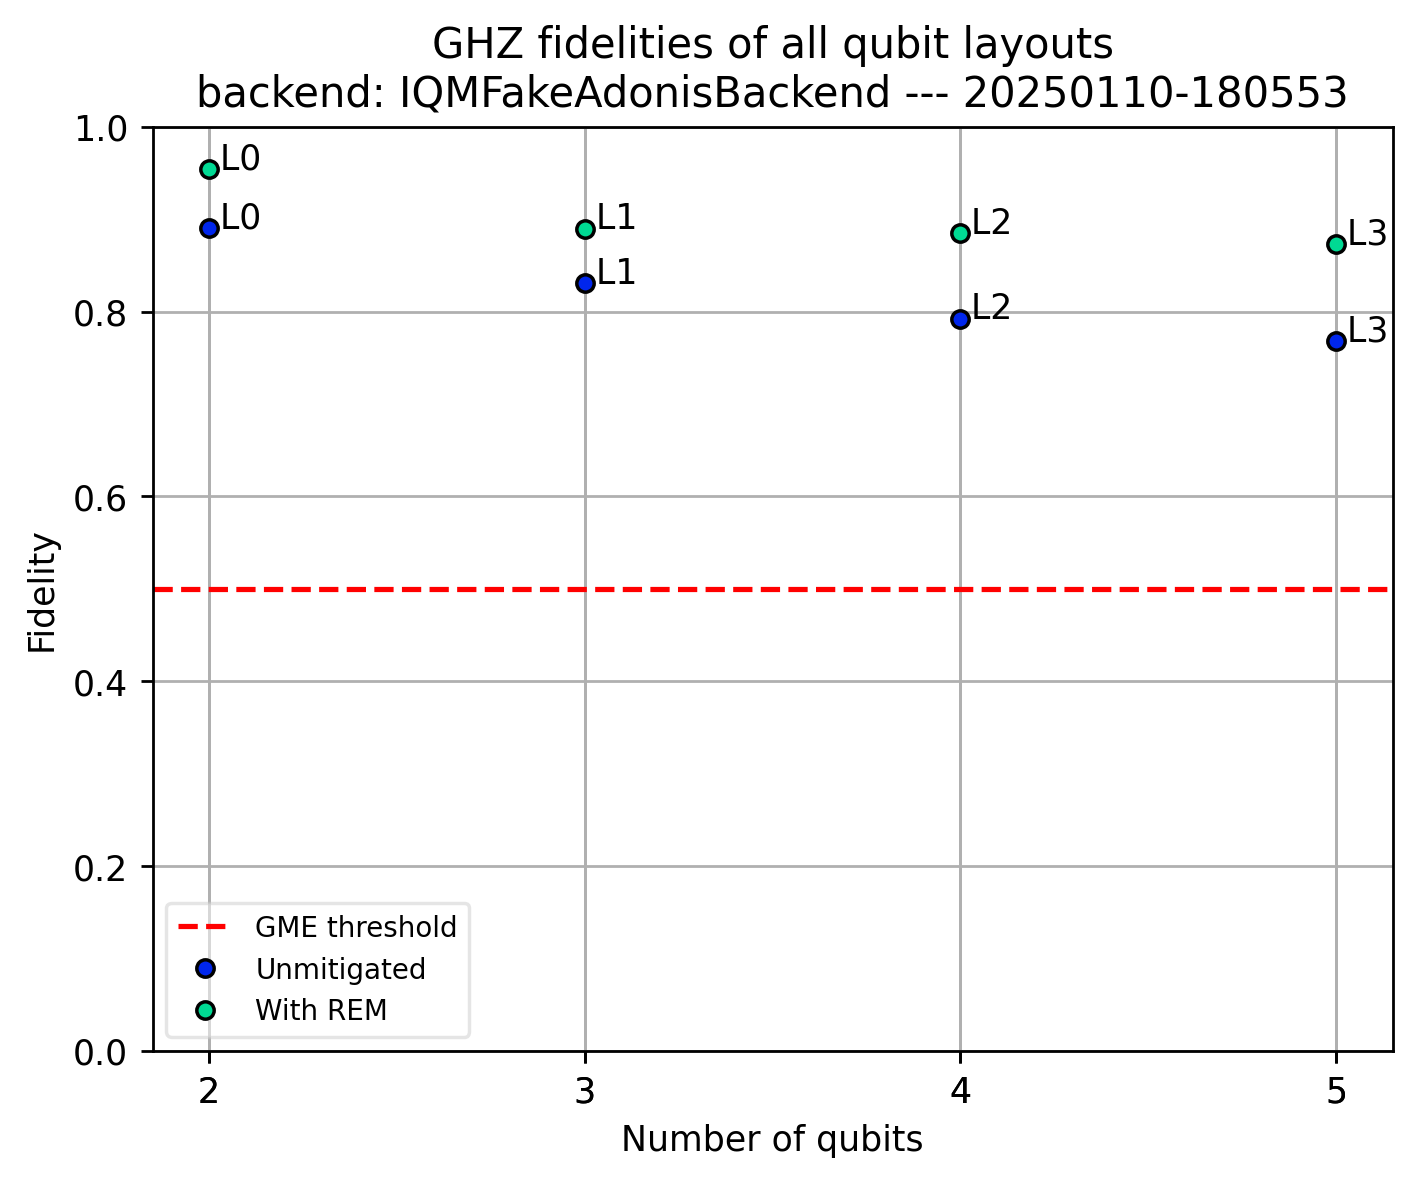

In [46]:
# Show observations for a specific qubit layout
qubit_layout = [0,1,2]
for observation in result.observations:
    if observation.identifier.string_identifier == str(qubit_layout):
        print(f"{observation.name}: {observation.value} +/- {observation.uncertainty}")
# Plot fidelities for all layouts
result.plot_all()

## QScore

In [47]:
from iqm.benchmarks.optimization.qscore import *
import random

In [48]:
EXAMPLE_QSCORE = QScoreConfiguration(
    num_instances = 100,
    num_qaoa_layers= 1,
    shots = 20_000,
    calset_id=None, # calibration set ID, default is None
    min_num_nodes =  2,
    max_num_nodes = 5,
    use_virtual_node = True,
    use_classically_optimized_angles = True,
    choose_qubits_routine = "custom",
    custom_qubits_array=[
                    [2, 0],
                    [2, 0, 1],
                    [2, 0, 1, 3],
                    [2, 0, 1, 3, 4]],
    seed = random.randint(1, 999999),
    )

In [49]:
benchmark_qscore = QScoreBenchmark(backend, EXAMPLE_QSCORE)
run_qscore = benchmark_qscore.run()

In [50]:
result_qscore = benchmark_qscore.analyze()

2025-01-10 18:06:08,904 - iqm.benchmarks.logging_config - INFO - Q-Score = 2 passed with approximation ratio (Beta) 0.4767; Avg MaxCut size: 0.4900
2025-01-10 18:06:09,643 - iqm.benchmarks.logging_config - INFO - Q-Score = 3 passed with approximation ratio (Beta) 0.6739; Avg MaxCut size: 1.3733
2025-01-10 18:06:10,677 - iqm.benchmarks.logging_config - INFO - Q-Score = 4 passed with approximation ratio (Beta) 0.6246; Avg MaxCut size: 2.3894
2025-01-10 18:06:12,136 - iqm.benchmarks.logging_config - INFO - Q-Score = 5 passed with approximation ratio (Beta) 0.4881; Avg MaxCut size: 3.4714


In [51]:
result_qscore.observations

[BenchmarkObservation(name='approximation_ratio', value=0.4767012007999197, identifier=BenchmarkObservationIdentifier(qubit_indices=2), uncertainty=0.09979310484432205),
 BenchmarkObservation(name='is_succesful', value='True', identifier=BenchmarkObservationIdentifier(qubit_indices=2), uncertainty=None),
 BenchmarkObservation(name='Qscore_result', value=2, identifier=BenchmarkObservationIdentifier(qubit_indices=2), uncertainty=None),
 BenchmarkObservation(name='approximation_ratio', value=0.6738975057778192, identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=0.07204344830310698),
 BenchmarkObservation(name='is_succesful', value='True', identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=None),
 BenchmarkObservation(name='Qscore_result', value=3, identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=None),
 BenchmarkObservation(name='approximation_ratio', value=0.6246025280898877, identifier=BenchmarkObservationIdentifier(qubit_

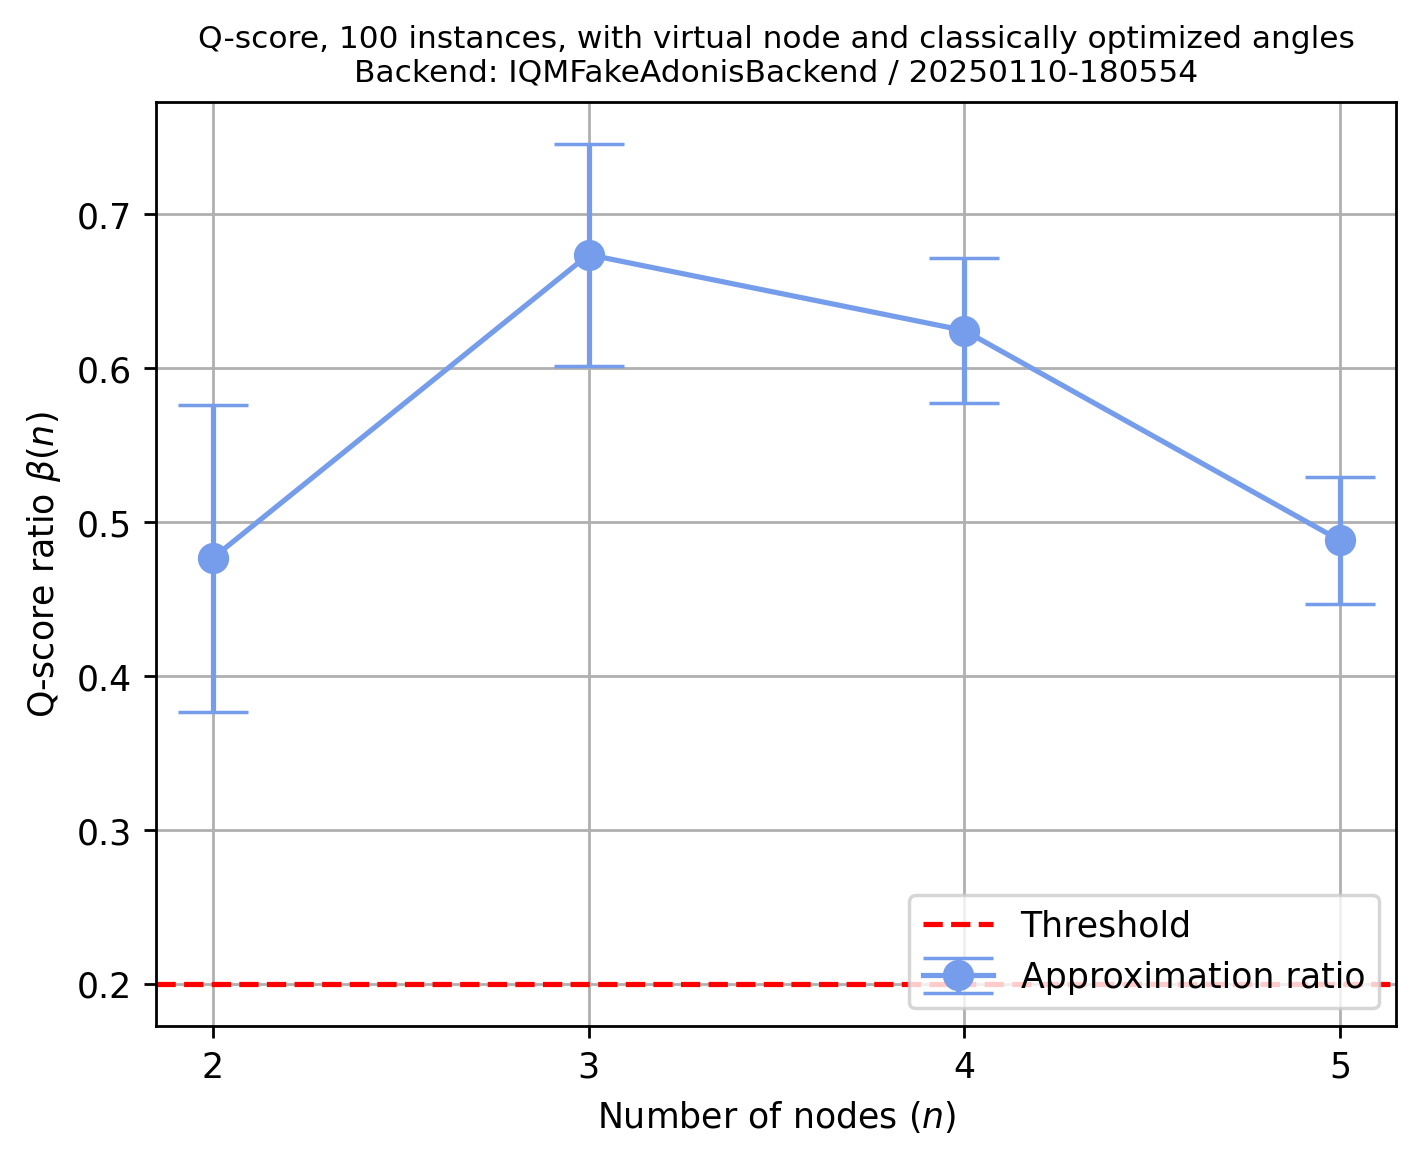

In [52]:
result_qscore.plot_all()